In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import spacy
import tqdm
from collections import Counter
from nltk import ngrams
from src.stats import make_stats

nlp = spacy.load('en_core_web_sm')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/splits/train.csv', 
                 header=None, 
                 names=['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 
                        'ContractType', 'ContractTime', 'Company', 'Category', 
                        'SalaryRaw', 'SalaryNormalized', 'SourceName'])

In [3]:
df

Id                                              Title  \
0       12612628                        Engineering Systems Analyst   
1       12612830                            Stress Engineer Glasgow   
2       12612844                   Modelling and simulation analyst   
3       12613049  Engineering Systems Analyst / Mathematical Mod...   
4       12613647         Pioneer, Miser Engineering Systems Analyst   
...          ...                                                ...   
176354  72705211                                 TEACHER OF SCIENCE   
176355  72705212                TEACHER OF BUSINESS STUDIES AND ICT   
176356  72705213                                    ENGLISH TEACHER   
176357  72705216                                    SUPPLY TEACHERS   
176358  72705235                                         Accountant   

                                          FullDescription  \
0       Engineering Systems Analyst Dorking Surrey Sal...   
1       Stress Engineer Glasgow Salary **** to **** We...   
2       Mathematical Modeller / Simulation Analyst / O...   
3       Engineering Systems Analyst / Mathematical Mod...   
4       Pioneer, Miser  Engineering Systems Analyst Do...   
...                                                   ...   
176354  Position: Qualified Teacher Subject/Specialism...   
176355  Position: Qualified Teacher or NQT Subject/Spe...   
176356  Position: Qualified Teacher Subject/Specialism...   
176357  Position: Qualified Teacher Subject/Specialism...   
176358  This entrepreneurial and growing private equit...   

                              LocationRaw LocationNormalized ContractType  \
0                 Dorking, Surrey, Surrey            Dorking          NaN   
1             Glasgow, Scotland, Scotland            Glasgow          NaN   
2       Hampshire, South East, South East          Hampshire          NaN   
3          Surrey, South East, South East             Surrey          NaN   
4          Surrey, South East, South East             Surrey          NaN   
...                                   ...                ...          ...   
176354                            Swindon            Swindon          NaN   
176355                            Swindon            Swindon          NaN   
176356                            Swindon            Swindon          NaN   
176357                          Wiltshire          Wiltshire          NaN   
176358                            Hitchin            Hitchin          NaN   

       ContractTime                       Company          Category  \
0         permanent  Gregory Martin International  Engineering Jobs   
1         permanent  Gregory Martin International  Engineering Jobs   
2         permanent  Gregory Martin International  Engineering Jobs   
3         permanent  Gregory Martin International  Engineering Jobs   
4         permanent  Gregory Martin International  Engineering Jobs   
...             ...                           ...               ...   
176354     contract                           NaN     Teaching Jobs   
176355     contract                           NaN     Teaching Jobs   
176356     contract                           NaN     Teaching Jobs   
176357     contract                           NaN     Teaching Jobs   
176358    permanent                           NaN     Teaching Jobs   

                                     SalaryRaw  SalaryNormalized  \
0                   20000 - 30000/annum 20-30K             25000   
1                   25000 - 35000/annum 25-35K             30000   
2                   20000 - 40000/annum 20-40K             30000   
3       25000 - 30000/annum 25K-30K negotiable             27500   
4                   20000 - 30000/annum 20-30K             25000   
...                                        ...               ...   
176354                      450 - 500 per week             22800   
176355                      450 - 500 per week             22800   
176356                      450 - 500 

In [4]:
df.describe(include='all')

Id                         Title  \
count   1.763590e+05                        176359   
unique           NaN                        104997   
top              NaN  Business Development Manager   
freq             NaN                           665   
mean    6.969759e+07                           NaN   
std     3.137044e+06                           NaN   
min     1.261263e+07                           NaN   
25%     6.869486e+07                           NaN   
50%     6.993702e+07                           NaN   
75%     7.162920e+07                           NaN   
max     7.270524e+07                           NaN   

                                          FullDescription LocationRaw  \
count                                              176359      176359   
unique                                             174954       17355   
top     What is expected of you as a Registered Nurse ...      London   
freq                                                   12       11259   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

       LocationNormalized ContractType ContractTime        Company Category  \
count              176359        47227       130262         153003   176359   
unique               2465            2            2          18032       29   
top                    UK    full_time    permanent  UKStaffsearch  IT Jobs   
freq                29613        41507       109141           3648    27664   
mean                  NaN          NaN          NaN            NaN      NaN   
std                   NaN          NaN          NaN            NaN      NaN   
min                   NaN          NaN          NaN            NaN      NaN   
25%                   NaN          NaN          NaN            NaN      NaN   
50%                   NaN          NaN          NaN            NaN      NaN   
75%                   NaN          NaN          NaN            NaN      NaN   
max                   NaN          NaN          NaN            NaN      NaN   

                   SalaryRaw  SalaryNormalized     SourceName  
count                 176359     176359.000000         176358  
unique                 75813               NaN            167  
top     50,000-74,999 yearly               NaN  totaljobs.com  
freq                    1371               NaN          34697  
mean                     NaN      34109.853764            NaN  
std                      NaN      17640.943789            NaN  
min                      NaN       5000.000000            NaN  
25%                      NaN      21500.000000            NaN  
50%                      NaN      30000.000000            NaN  
75%                      NaN      42500.000000            NaN  
max                      NaN     200000.000000            NaN

In [5]:
print(df.ContractType.hasnans)
print(df.ContractTime.hasnans)
print(df.Company.hasnans)
print(df.SourceName.hasnans)

True
True
True
True


In [6]:
df["FullText"] = df['Title'] + ' ' + df['FullDescription'] + ' ' + df['LocationRaw'] + ' ' \
    + df['ContractType'].fillna('') + ' ' + df['ContractTime'].fillna('') + ' ' \
    + df['Company'].fillna('') + ' ' + df['Category']

In [7]:
df['FullTextLower'] = df['FullText'].str.lower()

# Title

In [8]:
unigrams, bigrams, trigrams = make_stats.get_ngrams("Engineering Systems Analyst / Mathematical   Modeller  ****k")
print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Unigrams: ['engineering', 'systems', 'analyst', 'mathematical', 'modeller', '1k']
Bigrams: ['engineering systems', 'systems analyst', 'analyst mathematical', 'mathematical modeller', 'modeller 1k']
Trigrams: ['engineering systems analyst', 'systems analyst mathematical', 'analyst mathematical modeller', 'mathematical modeller 1k']


In [9]:
stats = make_stats.get_text_stats(df.Title)

100%|██████████| 1000/1000 [00:10<00:00, 93.54it/s]


In [10]:
print(stats['unigrams'].most_common(10))
print(stats['bigrams'].most_common(10))
print(stats['trigrams'].most_common(10))

[('job', 245), ('manager', 225), ('nurse', 222), ('home', 172), ('care', 167), ('worker', 162), ('rgn', 140), ('support', 134), ('rmn', 79), ('staff', 78)]
[('home manager', 112), ('support worker', 108), ('worker job', 91), ('staff nurse', 70), ('care assistant', 56), ('nurse job', 43), ('nursing home', 43), ('manager job', 39), ('registered nurse', 31), ('care worker', 31)]
[('support worker job', 68), ('chef de partie', 23), ('nursing home manager', 23), ('home manager job', 19), ('care worker job', 18), ('care assistant job', 17), ('care home manager', 15), ('health care assistant', 13), ('care assistant jobs', 12), ('staff nurse rgn', 12)]


In [11]:
print(df.Title.value_counts()[:20])

Business Development Manager    665
Project Manager                 534
Management Accountant           472
Sales Executive                 399
Account Manager                 394
Mechanical Design Engineer      334
Finance Manager                 325
Administrator                   318
Cleaner                         313
Credit Controller               311
Accounts Assistant              300
Recruitment Consultant          297
Financial Controller            283
Assistant Manager               281
Sales Manager                   268
Business Analyst                247
Quality Engineer                230
Marketing Manager               218
Project Engineer                206
Quantity Surveyor               201
Name: Title, dtype: int64


In [12]:
print(df.Title[0:1000].value_counts()[:20])

Staff Nurse                                             17
Home Manager                                            11
Deputy Manager                                           5
Support Worker Job Daventry                              4
Cluster Revenue Manager                                  4
RGN                                                      4
Staff Nurse (RGN)                                        3
Registered Home Manager                                  3
Support Worker Job Leeds                                 3
Residential Support Worker                               3
IT Support Technician                                    3
Night Nurse                                              3
RGN Nurse                                                3
RMN Staff Nurse                                          2
Home Care Assistant / Care Workers / Support Workers     2
Operations Manager West Yorkshire                        2
Registered Manager                                      

In [13]:
print(make_stats.display_text_stats("Title", stats))

Title
=====

Missing values: 0

Word count
----------
Max: 21
Min: 1
Mean: 4.458
Median: 4.0
Std: 1.9293097211178927
Percentiles:
- 0% : 1.0
- 25% : 3.0
- 50% : 4.0
- 75% : 5.0
- 90% : 7.0
- 95% : 8.0
- 99% : 11.0
- 100% : 21.0

Unigrams
--------
Unique: 857
Most common:
- job: 245
- manager: 225
- nurse: 222
- home: 172
- care: 167
- worker: 162
- rgn: 140
- support: 134
- rmn: 79
- staff: 78

Bigrams
-------
Unique: 1645
Most common:
- home manager: 112
- support worker: 108
- worker job: 91
- staff nurse: 70
- care assistant: 56
- nurse job: 43
- nursing home: 43
- manager job: 39
- registered nurse: 31
- care worker: 31

Trigrams
--------
Unique: 1773
Most common:
- support worker job: 68
- chef de partie: 23
- nursing home manager: 23
- home manager job: 19
- care worker job: 18
- care assistant job: 17
- care home manager: 15
- health care assistant: 13
- care assistant jobs: 12
- staff nurse rgn: 12

None


# Salaries

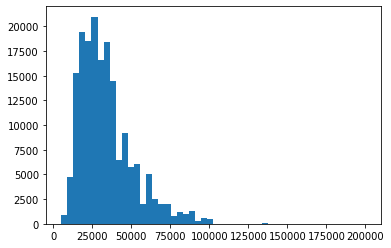

In [14]:
salaries = df.SalaryNormalized.values
plt.hist(salaries, bins=50)
plt.show()

(7164,)


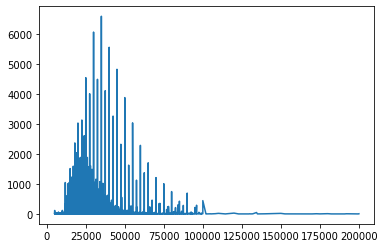

In [15]:
salary_freqs = np.unique(salaries, return_counts=True)
print(salary_freqs[0].shape)
plt.plot(salary_freqs[0], salary_freqs[1])
plt.show()

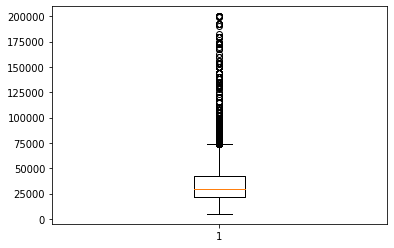

In [16]:
plt.boxplot(salaries)
plt.show()

In [17]:
percentiles = [0, 5, 25, 50, 75, 90, 95, 96, 99, 100]
for p in percentiles:
    print('{:>3}% : {:8.1f}'.format(p, np.percentile(salaries, p)))

  0% :   5000.0
  5% :  13750.0
 25% :  21500.0
 50% :  30000.0
 75% :  42500.0
 90% :  58578.0
 95% :  70000.0
 96% :  74000.0
 99% :  90000.0
100% : 200000.0


So about 4% or less of salaries are outliers (> £75,000)

## Scaling/normalisation

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [19]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
#     "Normalizer": Normalizer(),
    "QuantileTransformer_normal": QuantileTransformer(output_distribution='normal'),
    "QuantileTransformer_uniform": QuantileTransformer(output_distribution='uniform'),
    "PowerTransformer_yeo": PowerTransformer(method='yeo-johnson'),
    "PowerTransformer_boxcox": PowerTransformer(method='box-cox')
}

MinMaxScaler
[25000] [0.1025641] [25000.]
[30000] [0.12820513] [30000.]
[30000] [0.12820513] [30000.]
[27500] [0.11538462] [27500.]
[25000] [0.1025641] [25000.]
[25000] [0.1025641] [25000.]
[75000] [0.35897436] [75000.]
[85000] [0.41025641] [85000.]
[21000] [0.08205128] [21000.]
[45000] [0.20512821] [45000.]


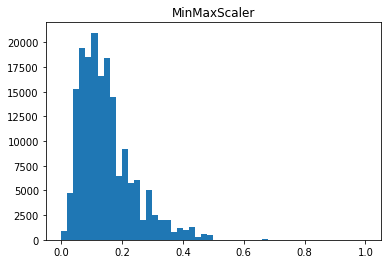

MaxAbsScaler
[25000] [0.125] [25000.]
[30000] [0.15] [30000.]
[30000] [0.15] [30000.]
[27500] [0.1375] [27500.]
[25000] [0.125] [25000.]
[25000] [0.125] [25000.]
[75000] [0.375] [75000.]
[85000] [0.425] [85000.]
[21000] [0.105] [21000.]
[45000] [0.225] [45000.]


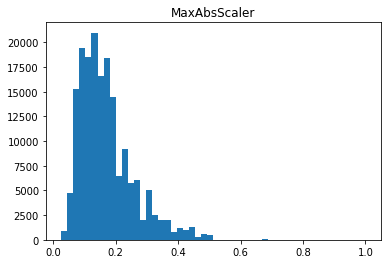

StandardScaler
[25000] [-0.51640545] [25000.]
[30000] [-0.2329731] [30000.]
[30000] [-0.2329731] [30000.]
[27500] [-0.37468928] [27500.]
[25000] [-0.51640545] [25000.]
[25000] [-0.51640545] [25000.]
[75000] [2.31791806] [75000.]
[85000] [2.88478276] [85000.]
[21000] [-0.74315134] [21000.]
[45000] [0.61732395] [45000.]


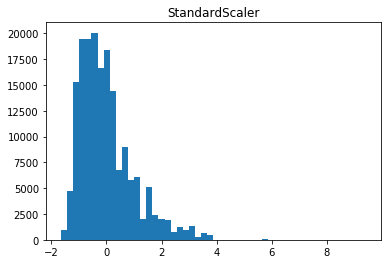

RobustScaler
[25000] [-0.23809524] [25000.]
[30000] [0.] [30000.]
[30000] [0.] [30000.]
[27500] [-0.11904762] [27500.]
[25000] [-0.23809524] [25000.]
[25000] [-0.23809524] [25000.]
[75000] [2.14285714] [75000.]
[85000] [2.61904762] [85000.]
[21000] [-0.42857143] [21000.]
[45000] [0.71428571] [45000.]


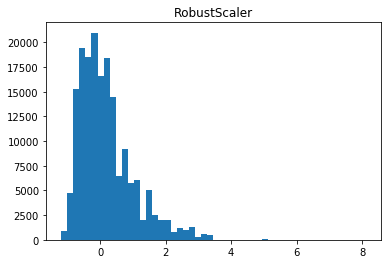

QuantileTransformer_normal
[25000] [-0.36419056] [25000.]
[30000] [0.00125457] [30000.]
[30000] [0.00125457] [30000.]
[27500] [-0.18037668] [27500.]
[25000] [-0.36419056] [25000.]
[25000] [-0.36419056] [25000.]
[75000] [1.79866258] [75000.]
[85000] [2.08535557] [85000.]
[21000] [-0.718462] [21000.]
[45000] [0.80395767] [45000.]


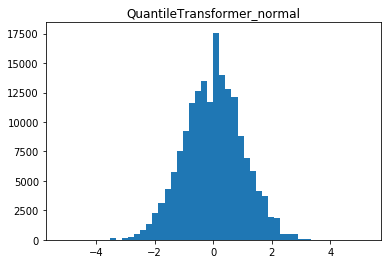

QuantileTransformer_uniform
[25000] [0.35485485] [25000.]
[30000] [0.497998] [30000.]
[30000] [0.497998] [30000.]
[27500] [0.42642643] [27500.]
[25000] [0.35485485] [25000.]
[25000] [0.35485485] [25000.]
[75000] [0.96396396] [75000.]
[85000] [0.98148148] [85000.]
[21000] [0.23523524] [21000.]
[45000] [0.78878879] [45000.]


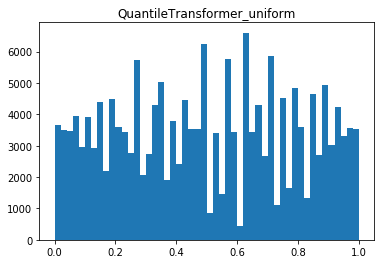

PowerTransformer_yeo
[25000] [-0.38170336] [25000.]
[30000] [-0.00953651] [30000.]
[30000] [-0.00953651] [30000.]
[27500] [-0.18694338] [27500.]
[25000] [-0.38170336] [25000.]
[25000] [-0.38170336] [25000.]
[75000] [1.83598184] [75000.]
[85000] [2.08488491] [85000.]
[21000] [-0.73915686] [21000.]
[45000] [0.81221312] [45000.]


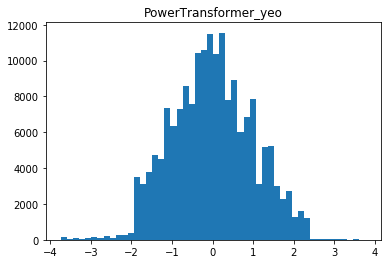

PowerTransformer_boxcox
[25000] [-0.38170253] [25000.]
[30000] [-0.00953739] [30000.]
[30000] [-0.00953739] [30000.]
[27500] [-0.18694347] [27500.]
[25000] [-0.38170253] [25000.]
[25000] [-0.38170253] [25000.]
[75000] [1.83598478] [75000.]
[85000] [2.08489114] [85000.]
[21000] [-0.73915449] [21000.]
[45000] [0.81221035] [45000.]


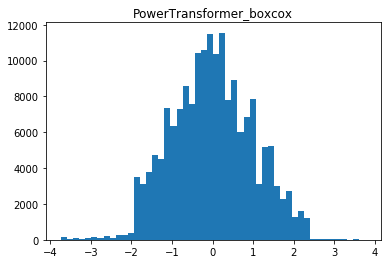

In [20]:
for name, scaler in scalers.items():
    print(name)
    transformed_salaries = scaler.fit_transform(salaries.reshape(-1, 1))
    reverted_salaries = scaler.inverse_transform(transformed_salaries)
    for s, t, r in zip(salaries.reshape(-1, 1)[0:10], transformed_salaries[0:10], reverted_salaries[0:10]):
        print(s, t, r)
    plt.hist(transformed_salaries, bins=50)
    plt.title(name)
    plt.show()

# ContractType

In [21]:
df.ContractType.value_counts(dropna=False)

NaN          129132
full_time     41507
part_time      5720
Name: ContractType, dtype: int64

In [22]:
# Of the jobs that don't specify contract type...
no_contract_type_df = df.where(df['ContractType'].isna())
no_contract_type_df.describe(include='all')

Id                         Title  \
count   1.291320e+05                        129132   
unique           NaN                         80809   
top              NaN  Business Development Manager   
freq             NaN                           541   
mean    6.984881e+07                           NaN   
std     2.860627e+06                           NaN   
min     1.261263e+07                           NaN   
25%     6.870614e+07                           NaN   
50%     6.997636e+07                           NaN   
75%     7.168135e+07                           NaN   
max     7.270524e+07                           NaN   

                                          FullDescription LocationRaw  \
count                                              129132      129132   
unique                                             128387       14074   
top     Find ****’s of vacancies like this on the sect...      London   
freq                                                   10        6653   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

       LocationNormalized ContractType ContractTime Company Category  \
count              129132            0       103171  111792   129132   
unique               2062            0            2   10841       29   
top                    UK          NaN    permanent    Hays  IT Jobs   
freq                24819          NaN        85957    1147    24190   
mean                  NaN          NaN          NaN     NaN      NaN   
std                   NaN          NaN          NaN     NaN      NaN   
min                   NaN          NaN          NaN     NaN      NaN   
25%                   NaN          NaN          NaN     NaN      NaN   
50%                   NaN          NaN          NaN     NaN      NaN   
75%                   NaN          NaN          NaN     NaN      NaN   
max                   NaN          NaN          NaN     NaN      NaN   

                   SalaryRaw  SalaryNormalized     SourceName  \
count                 129132     129132.000000         129131   
unique                 59520               NaN            129   
top     50,000-74,999 yearly               NaN  totaljobs.com   
freq                    1371               NaN          34149   
mean                     NaN      35593.982622            NaN   
std                      NaN      17873.044431            NaN   
min                      NaN       5000.000000            NaN   
25%                      NaN      22500.000000            NaN   
50%                      NaN      31500.000000            NaN   
75%                      NaN      45000.000000            NaN   
max                      NaN     200000.000000            NaN   

                                                 FullText  \
count                                              129132   
unique                                             129048   
top     Germanspeaking Customer Service Role for the w...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                            FullTextLower  
count                                              12

In [23]:
parttime = no_contract_type_df[no_contract_type_df['FullTextLower'].str.contains("parttime", na=False)]
print(len(parttime))
part_time = no_contract_type_df[no_contract_type_df['FullTextLower'].str.contains("part time", na=False)]
print(len(part_time))
parttime = pd.concat([parttime, part_time]).drop_duplicates().reset_index(drop=True)
print(len(parttime))

897
2342
2981


In [24]:
fulltime = no_contract_type_df[no_contract_type_df['FullTextLower'].str.contains("fulltime", na=False)]
print(len(fulltime))
full_time = no_contract_type_df[no_contract_type_df['FullTextLower'].str.contains("full time", na=False)]
print(len(full_time))
fulltime = pd.concat([fulltime, full_time]).drop_duplicates().reset_index(drop=True)
print(len(fulltime))

1498
6081
7448


In [25]:
# Which job descriptions mention both full time and part time?
full_part_df = pd.merge(fulltime, parttime, on=["Id"])
full_part_df

Id                                            Title_x  \
0     45358830.0                                    Waiter/Waitress   
1     46636849.0                                    RGN / RMN nurse   
2     46637454.0                                  Scrub Nurse / ODP   
3     47920423.0                       Anaesthetic Practitioner/ODP   
4     47920440.0                       Anaesthetic Practitioner/ODP   
...          ...                                                ...   
1101  72692127.0                          Student Support Assistant   
1102  72692131.0             Waking Night Student Support Assistant   
1103  72695664.0  Business Development Work from Home part time ...   
1104  72695773.0  Part Time / Full Time Business Development Wor...   
1105  72696194.0  Family living in Kingston Upon Thames are look...   

                                      FullDescription_x  \
0     CHAMPNEYS HEALTH RESORTS JOB DESCRIPTION JOB T...   
1     Situated in Downton just outside of Salisbury,...   
2     Scrub Nurse /ODP Cambridgeshire ****k  ****k b...   
3     Anaesthetic Practitioner/ODP Cambridgeshire **...   
4     Anaesthetic Practitioner/ODP Cambridgeshire **...   
...                                                 ...   
1101  Westerham Road, Westerham, Kent TN**** ****QN ...   
1102  Westerham Road, Westerham, Kent TN**** ****QN ...   
1103  A unique business opportunity allowing you to ...   
1104  Company: Forever Fantastic Business Developmen...   
1105  I'm looking for someone who can look after my ...   

                          LocationRaw_x  LocationNormalized_x ContractType_x  \
0                                 Tring                 Tring            NaN   
1                  Salisbury, Wiltshire             Salisbury            NaN   
2             Cambridge, Cambridgeshire             Cambridge            NaN   
3             Cambridge, Cambridgeshire             Cambridge            NaN   
4             Cambridge, Cambridgeshire             Cambridge            NaN   
...                                 ...                   ...            ...   
1101                          Westerham             Westerham            NaN   
1102                          Westerham             Westerham            NaN   
1103                    Yorkshire,Leeds                    UK            NaN   
1104  Tyne And Wear,Newcastle Upon Tyne                    UK            NaN   
1105               Kingston Upon Thames  Kingston Upon Thames            NaN   

     ContractTime_x                Company_x                     Category_x  \
0          contract  Champneys Health Resort                    Travel Jobs   
1               NaN                      NaN      Healthcare & Nursing Jobs   
2               NaN                      NaN      Healthcare & Nursing Jobs   
3               NaN                      NaN      Healthcare & Nursing Jobs   
4               NaN                      NaN      Healthcare & Nursing Jobs   
...             ...                      ...                            ...   
1101            NaN    Print Upsell S X Post      Healthcare & Nursing Jobs   
1102            NaN    Print Upsell S X Post      Healthcare & Nursing Jobs   
1103            NaN             Jobsite Jobs         Creative & Design Jobs   
1104      permanent             Jobsite Jobs                     Sales Jobs   
1105            NaN                      NaN  Domestic help & Cleaning Jobs   

                                           SalaryRaw_x  ...  \
0                                      5.25 - 6.11 p/h  ...   
1                              23000 to 24000 per year  ...   
2                              24000 to 27000 per year  ...   
3                              24000 to 27000 per year  ...   
4                              24000 to 28500 per year  ...   
...                                                ...  ...   
1101                                     7.60 per hour  ...   
1102                                  

- "Fulltime and Parttime vacancies"
- "There are both parttime and fulltime hours available"
- "a fulltime / parttime Scrub Nurse"
- "a fulltime / parttime anaesthetics practitioner"
- "Full Time and Part Time hours available"
- "Part Time hours... full time equivalent"
- "work from home either parttime or full time"
- "working part time or full time"
- "This may start off as a part time job share with a childminder then move into a full time position"

(array([197., 332., 324., 126.,  46.,  15.,  20.,  28.,  11.,   7.]),
 array([  5980.,  15382.,  24784.,  34186.,  43588.,  52990.,  62392.,
         71794.,  81196.,  90598., 100000.]),
 <a list of 10 Patch objects>)

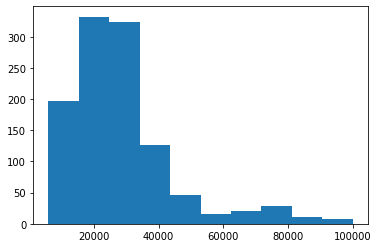

In [26]:
plt.hist(full_part_df.SalaryNormalized_y)

In [27]:
# Most (nearly half) of the "both full time or part time" jobs are in Healthcare/Nursing
full_part_df.describe(include='all')

Id      Title_x  \
count   1.106000e+03         1106   
unique           NaN          907   
top              NaN  Staff Nurse   
freq             NaN           15   
mean    6.905485e+07          NaN   
std     4.843688e+06          NaN   
min     4.535883e+07          NaN   
25%     6.867719e+07          NaN   
50%     6.985423e+07          NaN   
75%     7.180500e+07          NaN   
max     7.269663e+07          NaN   

                                        FullDescription_x LocationRaw_x  \
count                                                1106          1106   
unique                                               1093           647   
top     What is expected of you as a Registered Nurse ...        London   
freq                                                    7            28   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

       LocationNormalized_x ContractType_x ContractTime_x         Company_x  \
count                  1106              0            761               905   
unique                  332              0              2               407   
top                      UK            NaN      permanent  Swiis Healthcare   
freq                    204            NaN            476                93   
mean                    NaN            NaN            NaN               NaN   
std                     NaN            NaN            NaN               NaN   
min                     NaN            NaN            NaN               NaN   
25%                     NaN            NaN            NaN               NaN   
50%                     NaN            NaN            NaN               NaN   
75%                     NaN            NaN            NaN               NaN   
max                     NaN            NaN            NaN               NaN   

                       Category_x         SalaryRaw_x  ...  \
count                        1106                1106  ...   
unique                         28                 769  ...   
top     Healthcare & Nursing Jobs  14.00 - 20.00/Hour  ...   
freq                          522                  76  ...   
mean                          NaN                 NaN  ...   
std                           NaN                 NaN  ...   
min                           NaN                 NaN  ...   
25%                           NaN                 NaN  ...   
50%                           NaN                 NaN  ...   
75%                           NaN                 NaN  ...   
max                           NaN                 NaN  ...   

        LocationNormalized_y ContractType_y ContractTime_y         Company_y  \
count                   1106              0            761               905   
unique                   332              0              2               407   
top                       UK            NaN      permanent  Swiis Healthcare   
freq                     204            NaN            476                93   
mean                     NaN            NaN            NaN               NaN   
std                      NaN            NaN            NaN               NaN   
min                      NaN            NaN            NaN               NaN   
25%                      NaN            NaN            NaN               NaN   
50%                      NaN            NaN            NaN               NaN   
75%                      NaN            NaN            NaN               NaN   
max                      NaN            NaN            NaN               NaN   

                 

In [28]:
full_and_or_part_time = pd.concat([fulltime, parttime]).drop_duplicates().reset_index(drop=True)
print(len(full_and_or_part_time))

9323


In [29]:
# Subtract full_and_or_part_time from no_contract_type_df to find jobs whose contract type we can't infer
mystery_contracts = pd.merge(no_contract_type_df, full_and_or_part_time, on='Id', how='outer', indicator=True) \
                        .query('_merge == "left_only"') \
                        .drop('_merge', 1) \
                        .drop_duplicates().reset_index(drop=True)
mystery_contracts

Id                                            Title_x  \
0       12612628.0                        Engineering Systems Analyst   
1       12612830.0                            Stress Engineer Glasgow   
2       12612844.0                   Modelling and simulation analyst   
3       12613049.0  Engineering Systems Analyst / Mathematical Mod...   
4       12613647.0         Pioneer, Miser Engineering Systems Analyst   
...            ...                                                ...   
119805  72705209.0                                 TEACHER OF ENGLISH   
119806  72705211.0                                 TEACHER OF SCIENCE   
119807  72705213.0                                    ENGLISH TEACHER   
119808  72705216.0                                    SUPPLY TEACHERS   
119809  72705235.0                                         Accountant   

                                        FullDescription_x  \
0       Engineering Systems Analyst Dorking Surrey Sal...   
1       Stress Engineer Glasgow Salary **** to **** We...   
2       Mathematical Modeller / Simulation Analyst / O...   
3       Engineering Systems Analyst / Mathematical Mod...   
4       Pioneer, Miser  Engineering Systems Analyst Do...   
...                                                   ...   
119805  Position: Qualified Teacher Subject/Specialism...   
119806  Position: Qualified Teacher Subject/Specialism...   
119807  Position: Qualified Teacher Subject/Specialism...   
119808  Position: Qualified Teacher Subject/Specialism...   
119809  This entrepreneurial and growing private equit...   

                            LocationRaw_x LocationNormalized_x ContractType_x  \
0                 Dorking, Surrey, Surrey              Dorking            NaN   
1             Glasgow, Scotland, Scotland              Glasgow            NaN   
2       Hampshire, South East, South East            Hampshire            NaN   
3          Surrey, South East, South East               Surrey            NaN   
4          Surrey, South East, South East               Surrey            NaN   
...                                   ...                  ...            ...   
119805                            Swindon              Swindon            NaN   
119806                            Swindon              Swindon            NaN   
119807                            Swindon              Swindon            NaN   
119808                          Wiltshire            Wiltshire            NaN   
119809                            Hitchin              Hitchin            NaN   

       ContractTime_x                     Company_x        Category_x  \
0           permanent  Gregory Martin International  Engineering Jobs   
1           permanent  Gregory Martin International  Engineering Jobs   
2           permanent  Gregory Martin International  Engineering Jobs   
3           permanent  Gregory Martin International  Engineering Jobs   
4           permanent  Gregory Martin International  Engineering Jobs   
...               ...                           ...               ...   
119805       contract                           NaN     Teaching Jobs   
119806       contract                           NaN     Teaching Jobs   
119807       contract                           NaN     Teaching Jobs   
119808       contract                           NaN     Teaching Jobs   
119809      permanent                           NaN     Teaching Jobs   

                                   SalaryRaw_x  ...  LocationNormalized_y  \
0                   20000 - 30000/annum 20-30K  ...                   NaN   
1                   25000 - 35000/annum 25-35K  ...                   NaN   
2                   20000 - 40000/annum 20-40K  ...                   NaN   
3       25000 - 30000/annum 25K-30K negotiable  ...                   NaN   
4                   20000 - 30000/annum 20-30K  ...                   NaN   
...                                        ...  ...                   ...   
119805           

In [30]:
# The majority of jobs that don't specify ContractType are "IT Jobs"
mystery_contracts.describe(include='all')

Id                       Title_x  \
count   1.198090e+05                        119809   
unique           NaN                         74808   
top              NaN  Business Development Manager   
freq             NaN                           532   
mean    6.988589e+07                           NaN   
std     2.757217e+06                           NaN   
min     1.261263e+07                           NaN   
25%     6.870713e+07                           NaN   
50%     6.998677e+07                           NaN   
75%     7.168523e+07                           NaN   
max     7.270524e+07                           NaN   

                                        FullDescription_x LocationRaw_x  \
count                                              119809        119809   
unique                                             119104         13201   
top     Find ****’s of vacancies like this on the sect...        London   
freq                                                   10          6369   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

       LocationNormalized_x ContractType_x ContractTime_x Company_x  \
count                119809              0          96583    103805   
unique                 1952              0              2     10300   
top                      UK            NaN      permanent      Hays   
freq                  22914            NaN          81072      1048   
mean                    NaN            NaN            NaN       NaN   
std                     NaN            NaN            NaN       NaN   
min                     NaN            NaN            NaN       NaN   
25%                     NaN            NaN            NaN       NaN   
50%                     NaN            NaN            NaN       NaN   
75%                     NaN            NaN            NaN       NaN   
max                     NaN            NaN            NaN       NaN   

       Category_x           SalaryRaw_x  ...  LocationNormalized_y  \
count      119809                119809  ...                     0   
unique         28                 55475  ...                     0   
top       IT Jobs  50,000-74,999 yearly  ...                   NaN   
freq        23809                  1351  ...                   NaN   
mean          NaN                   NaN  ...                   NaN   
std           NaN                   NaN  ...                   NaN   
min           NaN                   NaN  ...                   NaN   
25%           NaN                   NaN  ...                   NaN   
50%           NaN                   NaN  ...                   NaN   
75%           NaN                   NaN  ...                   NaN   
max           NaN                   NaN  ...                   NaN   

       ContractType_y ContractTime_y Company_y Category_y SalaryRaw_y  \
count               0              0         0          0           0   
unique              0              0         0          0           0   
top               NaN            NaN       NaN        NaN         NaN   
freq              NaN            NaN       NaN        NaN         NaN   
mean              NaN            NaN       NaN        NaN         NaN   
std               NaN            NaN       NaN        NaN         NaN   
min               NaN            NaN       NaN        NaN         NaN   
25%               NaN            NaN       NaN        NaN         NaN   
50%               NaN            NaN       NaN        NaN         NaN   
75%               NaN            NaN       N

In [31]:
mystery_contracts[mystery_contracts['SalaryRaw_x'].str.contains('hour', case=False, na=False)]

Id                                          Title_x  \
14      24104334.0  Relief Chef de Partie  Croydon, Surrey  Live in   
29      28059808.0                           Documentation Engineer   
30      29570321.0    Trampoline Coach  Bushey Grove Leisure Centre   
31      29570883.0               Self Employed Swimming Instructors   
32      29570885.0                      Self Employed Sport Coaches   
...            ...                                              ...   
119607  72696601.0                Occasional Childcare/Mothers Help   
119608  72696622.0                                         Bellhill   
119681  72697216.0                               Electrical Foreman   
119711  72697506.0                                Warranty Engineer   
119793  72703380.0       Social Worker  Childrens Safeguarding Team   

                                        FullDescription_x  \
14       HOTEL AND CONFERENCE VENUE CHAIN  RELIEF CHEF...   
29      Our client is looking for a Documentation Engi...   
30      We are looking for a motivated, hard working, ...   
31      Do you have a passion for Swimming? Can you mo...   
32      Do you have a passion for Sport? Can you motiv...   
...                                                   ...   
119607  Hi there, I am looking for childcare assistanc...   
119608  bellshill babysitter wanted Requirements: Look...   
119681  Resourcing Solutions are looking for an Electr...   
119711  Our Midlands based client is looking to recrui...   
119793  Child Protection Social Worker Job ThreeMonth ...   

                          LocationRaw_x LocationNormalized_x ContractType_x  \
14      South Croydon Surrey South East                   UK            NaN   
29                   Greater Manchester           Manchester            NaN   
30                Bushey, Hertfordshire               Bushey            NaN   
31             Kirklees, West Yorkshire                   UK            NaN   
32             Kirklees, West Yorkshire                   UK            NaN   
...                                 ...                  ...            ...   
119607                   Steeple Morden       Steeple Morden            NaN   
119608                           Lanark               Lanark            NaN   
119681    Manchester,Greater Manchester                   UK            NaN   
119711           Coventry,West Midlands                   UK            NaN   
119793                             York                 York            NaN   

       ContractTime_x                 Company_x  \
14                NaN        Towngate Personnel   
29           contract   Rullion Engineering Ltd   
30          permanent         Hertsmere Leisure   
31          permanent   Kirklees Active Leisure   
32           contract   Kirklees Active Leisure   
...               ...                       ...   
119607            NaN                       NaN   
119608            NaN                       NaN   
119681       contract  Resourcing Solutions Ltd   
119711       contract  Resourcing Solutions Ltd   
119793       contract                       NaN   

                           Category_x  \
14        Hospitality & Catering Jobs   
29                   Engineering Jobs   
30                        Travel Jobs   
31                        Travel Jobs   
32                        Travel Jobs   
...                               ...   
119607  Domestic help & Cleaning Jobs   
119608  Domestic help & Cleaning Jobs   
119681               Engineering Jobs   
119711               Engineering Jobs   
119793             Other/General Jobs   

                                              SalaryRaw_x  ...  \
14                                        Upto 9 per hour  ...   
29                                                25/hour  ...   
30      *11.22 per hour (Level 2 Coach) *13.33 per hou...  ...   
31                                12.91 to 13.94 per hour  ...   
32                                 8.84 to 12

SalaryRaw (yearly, per annum, per week, etc.) doesn't tell us whether the job is part-time or full-time.

Looking at the descriptions of these jobs, it would seem that it would be safe to assume that such jobs are full-time unless the description includes `parttime` or `part time`. So that'd be about $2,981 + 5,720 = 8,701$ part-time jobs. 

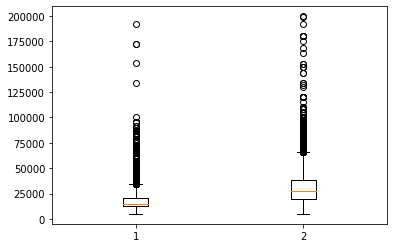

In [32]:
part_time_salaries = df[df['ContractType'] == 'part_time'].SalaryNormalized.values
full_time_salaries = df[df['ContractType'] == 'full_time'].SalaryNormalized.values

plt.boxplot([part_time_salaries, full_time_salaries])
plt.show()

# ContractType

In [116]:
df.ContractType.value_counts(dropna=False)

NaN          129132
full_time     41507
part_time      5720
Name: ContractType, dtype: int64

In [118]:
part_time_df = df[df.ContractType == 'part_time']
part_time_df

Id                                            Title  \
146     46626799         Saturday only Night Nurse Job Winchester   
148     46626831      Registered Mental Health Nurse (RMN) Durham   
149     46626832  Registered Mental Health Nurse (RMN) Sunderland   
150     46626833        Registered General Nurse (RGN) Sunderland   
172     46627102           Home Healthcare Assistant Job Aberdeen   
...          ...                                              ...   
175758  72692121                        Private Medical Secretary   
175759  72692124                           Travel Admin Assistant   
175765  72692143             SCHEDULER / ADMINISTRATIVE ASSISTANT   
176124  72696896                            Health Safety Manager   
176228  72701423                Adult Speech & Language Therapist   

                                          FullDescription  \
146     Saturday only Night Nurse Job Winchester Cover...   
148     Registered Mental Health Nurse (RMN) Durham Go...   
149     Registered Mental Health Nurse (RMN) Sunderlan...   
150     Registered General Nurse (RGN) Sunderland Good...   
172     Home Healthcare Assistant Job Aberdeen Home Ca...   
...                                                   ...   
175758  Parttime Private Medical Secretary Based in Ca...   
175759  Individual required to carry out the day to da...   
175765  SCHEDULER/ADMINISTRATIVE ASSISTANT 20 hours pe...   
176124  My client requires an experienced Health and S...   
176228  MedicsPro are looking for an Adult Speech & La...   

                  LocationRaw LocationNormalized ContractType ContractTime  \
146     Winchester, Hampshire         Winchester    part_time          NaN   
148                    Durham             Durham    part_time          NaN   
149                Sunderland         Sunderland    part_time          NaN   
150                Sunderland         Sunderland    part_time          NaN   
172        Aberdeen, Scotland           Aberdeen    part_time          NaN   
...                       ...                ...          ...          ...   
175758                   City           The City    part_time          NaN   
175759        Hartley Wintney    Hartley Wintney    part_time          NaN   
175765            Cowdenbeath        Cowdenbeath    part_time          NaN   
176124                 London             London    part_time          NaN   
176228                   Bath               Bath    part_time     contract   

                                         Company                   Category  \
146                                          NaN  Healthcare & Nursing Jobs   
148                                          NaN  Healthcare & Nursing Jobs   
149                                          NaN  Healthcare & Nursing Jobs   
150                                          NaN  Healthcare & Nursing Jobs   
172                                          NaN  Healthcare & Nursing Jobs   
...                                          ...                        ...   
175758         Londonjobs Evening Standard Ptner         Other/General Jobs   
175759                       Jupp Castle Limited                Travel Jobs   
175765                          Clyde and Forth                  Admin Jobs   
176124  Fasttrack Management Services London Ltd           Engineering Jobs   
176228                             MedicsPro Ltd         Other/General Jobs   

                                   SalaryRaw  SalaryNormalized  \
146                           13.16 per hour             25267   
148                  13.00 to 18.00 per hour             29760   
149                  13.00 to 18.00 per hour             29760   
150                  12.50 to 17.50 per hour             28800   
172     7 per hour to 8.50 per hour per hour             14880   
...                                      ...               ...   
175758                                13,000             13000   
175759                                

How many `part_time` jobs have "Part Time" in the title?

Answer: 673 out of 5,720

In [120]:
print(len(part_time_df))
part_time_df[part_time_df.Title.str.contains(r'part[ -]?time', case=False)]

5720


Id                                              Title  \
210     46627487  Part Time Band 5 Pharmacy Technician Job Lanca...   
793     46635555                 Dental Nurse Part Time Southampton   
1294    50255413               Home Care Worker Part Time (Rutland)   
1295    50255414              Home Care Workers Part Time (Rutland)   
2184    56366338  Part time Speech and Language Therapist requir...   
...          ...                                                ...   
171437  72607042                  Retail Security Officer/Part Time   
171883  72624988                  Parttime administrator/bookkeeper   
173694  72673712                    PartTime Training Administrator   
173935  72676069                          Part Time  Work from home   
175179  72690184                             Book Keeper  Part Time   

                                          FullDescription  \
210     Part Time Band 5 Pharmacy Technician Job Lanca...   
793     Dental Nurse Southampton Part Time (**** hrs w...   
1294    We are currently have postions available for P...   
1295    We are currently have postions available for P...   
2184    Lovely twoform entry primary school in Southwa...   
...                                                   ...   
171437  Working as a Retail Security Officer in food r...   
171883  GDF UK is a registered charity in the UK. We p...   
173694  Office Angels are currently recruiting for a P...   
173935  Five selfemployed new colleagues wanted to hel...   
175179  Job Role: This is a part time position of 15 h...   

                                   LocationRaw LocationNormalized  \
210                                 Lancashire         Lancashire   
793                     Southampton, Hampshire                 UK   
1294                        Uppingham, Rutland          Uppingham   
1295                           Oakham, Rutland             Oakham   
2184                                    London             London   
...                                        ...                ...   
171437                              Manchester         Manchester   
171883                              South East  South East London   
173694  Slough, Berkshire Berkshire South East             Slough   
173935                     Wrexham Clwyd Wales                 UK   
175179                                  London             London   

       ContractType ContractTime                      Company  \
210       part_time          NaN                          NaN   
793       part_time          NaN                          NaN   
1294      part_time          NaN                          NaN   
1295      part_time          NaN                          NaN   
2184      part_time     contract              Career Teachers   
...             ...          ...                          ...   
171437    part_time          NaN            Cardinal Security   
171883    part_time          NaN  Global Diversity Foundation   
173694    part_time          NaN                Office Angels   
173935    part_time          NaN                  Hiredonline   
175179    part_time          NaN     Smart Recruit Online Ltd   

                         Category  \
210     Healthcare & Nursing Jobs   
793     Healthcare & Nursing Jobs   
1294    Healthcare & Nursing Jobs   
1295    Healthcare & Nursing Jobs   
2184                Teaching Jobs   
...                           ...   
171437         Other/General Jobs   
171883   Charity & Voluntary Jobs   
173694                 Admin Jobs   
173935                 Sales Jobs   
175179  Accounting & Finance Jobs   

                                                SalaryRaw  SalaryNormalized  \
210                                  18 per hour per hour             34560   
793                               10000 to 11000 per year             10500   
1294                                7.50 to 8.00 per hour             14880   
1295                                7.50 to 8.00 per hour

In [119]:
full_time_df = df[df.ContractType == 'full_time']
full_time_df

Id                                              Title  \
47      31794403             Senior **** IT Recruitment Consulltant   
112     44156175  Business Development/ Account Management/ IT s...   
127     46206763                    National Key Account Manager UK   
131     46626508                        Support Worker Job Chepstow   
132     46626509                     Support Worker Job Abergavenny   
...          ...                                                ...   
176324  72703235                                     Events Officer   
176339  72703432  Salaried GP, Essex, 4 days per week, ****k  NH...   
176340  72703435          Long Haul Travel Consultant Staffordshire   
176341  72703444                     Home Working Cruise Consultant   
176342  72703454               Personal Travel Expert Luxury Travel   

                                          FullDescription  \
47      Inspire is a leading IT services company speci...   
112     We are searching for a New Business Account Ma...   
127     Purpose of the Job: As a Key Account Manager y...   
131     Support Worker Job Chepstow We are a leading p...   
132     Support Worker Job Abergavenny We are a leadin...   
...                                                   ...   
176324  A well respected notforprofit membership organ...   
176339  Salaried GP needed in Essex, 4 days per week. ...   
176340  Are you a Travel Consultant who is truly passi...   
176341  Travel Consultants, we have an amazing opportu...   
176342  PERSONAL TRAVEL EXPERT Location  Birmingham Sa...   

                         LocationRaw  LocationNormalized ContractType  \
47               Lingfield, Surrey ,           Lingfield    full_time   
112                Burton On Trent ,     Burton-On-Trent    full_time   
127             South East England ,  South East England    full_time   
131                  Chepstow, Gwent                  UK    full_time   
132     Abergavenney, Monnmouthshire                  UK    full_time   
...                              ...                 ...          ...   
176324                        London              London    full_time   
176339             Essex, South East                  UK    full_time   
176340                 Staffordshire       Staffordshire    full_time   
176341                 West Midlands       West Midlands    full_time   
176342                    Birmingham          Birmingham    full_time   

       ContractTime                     Company  \
47              NaN         Inspire Corporation   
112             NaN             Blues Point Ltd   
127             NaN                  SourceDogg   
131             NaN                         NaN   
132             NaN                         NaN   
...             ...                         ...   
176324    permanent             ESP Recruitment   
176339    permanent  Global Medics Permanent UK   
176340    permanent    Travel Trade Recruitment   
176341    permanent    Travel Trade Recruitment   
176342    permanent             AA Appointments   

                                Category  \
47                    Other/General Jobs   
112                   Other/General Jobs   
127                   Other/General Jobs   
131            Healthcare & Nursing Jobs   
132            Healthcare & Nursing Jobs   
...                                  ...   
176324  PR, Advertising & Marketing Jobs   
176339         Healthcare & Nursing Jobs   
176340                       Travel Jobs   
176341                       Travel Jobs   
176342                       Travel Jobs   

                                                SalaryRaw  SalaryNormalized  \
47                       20 - 25k Basic,  70 - 75K OTE+++             22500   
112              21,000 + Uncapped Commission + Pool Cars             21000   
127                          40,000 - 50,000 plus package             45000   
131                                         6.43 per hour             12345   
132           

How many `part_time` jobs have "Part Time" in FullDescription?

Answer: 1,724 out of 5,720

In [122]:
print(len(part_time_df))
part_time_df[part_time_df.FullDescription.str.contains(r'part[ -]?time', case=False)]

5720


Id                                          Title  \
146     46626799       Saturday only Night Nurse Job Winchester   
181     46627144            Community Support Worker Job Woking   
192     46627263                           Care Assistant Frome   
195     46627290  Community Learning Disability Support Workers   
203     46627403                     Support Worker Job Preston   
...          ...                                            ...   
175575  72691443                           Office Administrator   
175642  72691688                       Customer Support Officer   
175751  72692076    Stores Operative / Stores Person / Goods In   
175758  72692121                      Private Medical Secretary   
176124  72696896                          Health Safety Manager   

                                          FullDescription  \
146     Saturday only Night Nurse Job Winchester Cover...   
181     Community Support Worker Job Woking Previous e...   
192     Care Assistant Frome, Somerset PSP Healthcare ...   
195     Community Support Workers We are currently see...   
203     Support Worker Job Preston Job title: Care Sup...   
...                                                   ...   
175575  Wholesale Meat distributor based in Smithfield...   
175642  Open College Network South West Region (OCNSWR...   
175751  Part Time Stores Operative, Bar Hill, **** per...   
175758  Parttime Private Medical Secretary Based in Ca...   
176124  My client requires an experienced Health and S...   

                                              LocationRaw LocationNormalized  \
146                                 Winchester, Hampshire         Winchester   
181                                        Woking, Surrey             Woking   
192                                       Frome, Somerset              Frome   
195                             Cambridge, Cambridgeshire          Cambridge   
203                                   Preston, Lancashire            Preston   
...                                                   ...                ...   
175575                                               EC1M         Farringdon   
175642                                           Plymouth           Plymouth   
175751  Bar Hill,Cambridge,Swavesey,Huntingdon,St. Ive...                 UK   
175758                                               City           The City   
176124                                             London             London   

       ContractType ContractTime                                   Company  \
146       part_time          NaN                                       NaN   
181       part_time          NaN                                       NaN   
192       part_time          NaN                                       NaN   
195       part_time          NaN                                       NaN   
203       part_time          NaN                                       NaN   
...             ...          ...                                       ...   
175575    part_time          NaN                         Scott Merrick LLP   
175642    part_time          NaN    Open College Network South West Region   
175751    part_time          NaN                   Meyer Scott Recruitment   
175758    part_time          NaN         Londonjobs Evening Standard Ptner   
176124    part_time          NaN  Fasttrack Management Services London Ltd   

                         Category               SalaryRaw  SalaryNormalized  \
146     Healthcare & Nursing Jobs          13.16 per hour             25267   
181     Healthcare & Nursing Jobs  7.00 to 12.00 per hour             18240   
192     Healthcare & Nursing Jobs   6.10 to 6.25 per hour             11856   
195     Healthcare & Nursing Jobs   6.50 to 8.30 per hour             14208   
203     Healthcare & Nursing Jobs   7.15 to 8.50 per hour             15024   
...                           ...                     ...               ...   
175575                 Ad

In [124]:
# How many part_time jobs mention "Part Time" in the title and/or description?
len(part_time_df[part_time_df.FullDescription.str.contains(r'part[ -]?time', case=False) | part_time_df.Title.str.contains(r'part[ -]?time', case=False)])

1890

Examples of `part_time` jobs that don't mention "Part Time" in the title or description:

In [125]:
part_time_df[~part_time_df.FullDescription.str.contains(r'part[ -]?time', case=False) & ~part_time_df.Title.str.contains(r'part[ -]?time', case=False)]

Id                                            Title  \
148     46626831      Registered Mental Health Nurse (RMN) Durham   
149     46626832  Registered Mental Health Nurse (RMN) Sunderland   
150     46626833        Registered General Nurse (RGN) Sunderland   
172     46627102           Home Healthcare Assistant Job Aberdeen   
173     46627116            Residential Support Worker Job Surrey   
...          ...                                              ...   
175687  72691835                    Intervenor  Deafblind Charity   
175718  72691958                                 Customer Adviser   
175759  72692124                           Travel Admin Assistant   
175765  72692143             SCHEDULER / ADMINISTRATIVE ASSISTANT   
176228  72701423                Adult Speech & Language Therapist   

                                          FullDescription         LocationRaw  \
148     Registered Mental Health Nurse (RMN) Durham Go...              Durham   
149     Registered Mental Health Nurse (RMN) Sunderlan...          Sunderland   
150     Registered General Nurse (RGN) Sunderland Good...          Sunderland   
172     Home Healthcare Assistant Job Aberdeen Home Ca...  Aberdeen, Scotland   
173     Residential Support Worker Job Surrey Just Soc...              Surrey   
...                                                   ...                 ...   
175687  Our client is a national charity providing sup...        Peterborough   
175718  Being a Customer Advisor (or a Cooperative Ope...          Manchester   
175759  Individual required to carry out the day to da...     Hartley Wintney   
175765  SCHEDULER/ADMINISTRATIVE ASSISTANT 20 hours pe...         Cowdenbeath   
176228  MedicsPro are looking for an Adult Speech & La...                Bath   

       LocationNormalized ContractType ContractTime                Company  \
148                Durham    part_time          NaN                    NaN   
149            Sunderland    part_time          NaN                    NaN   
150            Sunderland    part_time          NaN                    NaN   
172              Aberdeen    part_time          NaN                    NaN   
173                Surrey    part_time          NaN                    NaN   
...                   ...          ...          ...                    ...   
175687       Peterborough    part_time          NaN  Coach House Media Ltd   
175718         Manchester    part_time          NaN          SMRS Limited    
175759    Hartley Wintney    part_time          NaN    Jupp Castle Limited   
175765        Cowdenbeath    part_time          NaN       Clyde and Forth    
176228               Bath    part_time     contract          MedicsPro Ltd   

                         Category                             SalaryRaw  \
148     Healthcare & Nursing Jobs               13.00 to 18.00 per hour   
149     Healthcare & Nursing Jobs               13.00 to 18.00 per hour   
150     Healthcare & Nursing Jobs               12.50 to 17.50 per hour   
172     Healthcare & Nursing Jobs  7 per hour to 8.50 per hour per hour   
173     Healthcare & Nursing Jobs               8p/hr to 9p/hr per hour   
...                           ...                                   ...   
175687  Healthcare & Nursing Jobs              15,768 - 17,920 pro rata   
175718     Customer Services Jobs                 12,800.00 - 16,000.00   
175759                Travel Jobs                                7.70ph   
175765                 Admin Jobs                             7.50 p/h.   
176228         Other/General Jobs                      25 - 35 per hour   

        SalaryNormalized           SourceName  \
148                29760       careworx.co.uk   
149                29760       careworx.co.uk   
150                28800       careworx.co.uk   
172                14880       careworx.co.uk   
173                16320       careworx.co.uk   
...                  ...                  ...   
175687             16844       

How about jobs that don't have a ContractType but mention "part time" in title and/or description?

In [132]:
no_contract_type = df[df.ContractType.isna()]

In [185]:
no_contract_type[no_contract_type.Title.str.contains(r'part[ -]?time|P/T', case=False) | no_contract_type.FullDescription.str.contains(r'part[ -]?time|P/T', case=False)]

Id                                              Title  \
117     45358813                            Reservations Consultant   
119     45358830                                    Waiter/Waitress   
191     46627261                  Care Assistant Hatherleigh, Devon   
292     46628057  Nurses needed for Acute Hospital in Redhill, S...   
694     46634307                             RGN Wigan ****per hour   
...          ...                                                ...   
176106  72696480                                        Housekeeper   
176113  72696582    Live out Nanny for **** babies, **** month olds   
176114  72696587       Family living in Filey are looking for Nanny   
176118  72696629                        Babysitter and Summer Nanny   
176290  72702721               Purchase Ledger / Accounts Assistant   

                                          FullDescription  \
117     JOB TITLE: Reservations Consultant  parttime H...   
119     CHAMPNEYS HEALTH RESORTS JOB DESCRIPTION JOB T...   
191     Care Assistant Hatherleigh, Devon PSP Healthca...   
292     PULSE Nursing & Care are currently seeking Nur...   
694     Staff Nurse RGN  Wigan Part Time Nights **** p...   
...                                                   ...   
176106  P/T housekeeper required 2**** hours per day. ...   
176113  Hi We are looking for an experienced nanny to ...   
176114  Married mother of a very active and inquisitiv...   
176118  We're new to the area and looking for a regula...   
176290  A Purchase Ledger/ Accounts Assistant is requi...   

                      LocationRaw LocationNormalized ContractType  \
117                        Henlow             Henlow          NaN   
119                         Tring              Tring          NaN   
191            Hatherleigh, Devon        Hatherleigh          NaN   
292               Redhill, Surrey            Redhill          NaN   
694     Wigan, Greater Manchester              Wigan          NaN   
...                           ...                ...          ...   
176106                     Romsey             Romsey          NaN   
176113                     Harrow             Harrow          NaN   
176114                      Filey              Filey          NaN   
176118                   Charlton           Charlton          NaN   
176290                 Bollington         Bollington          NaN   

       ContractTime                  Company                       Category  \
117       permanent  Champneys Health Resort                    Travel Jobs   
119        contract  Champneys Health Resort                    Travel Jobs   
191             NaN                      NaN      Healthcare & Nursing Jobs   
292             NaN                      NaN      Healthcare & Nursing Jobs   
694             NaN                      NaN      Healthcare & Nursing Jobs   
...             ...                      ...                            ...   
176106          NaN                      NaN  Domestic help & Cleaning Jobs   
176113          NaN                      NaN  Domestic help & Cleaning Jobs   
176114          NaN                      NaN  Domestic help & Cleaning Jobs   
176118          NaN                      NaN  Domestic help & Cleaning Jobs   
176290     contract                      NaN                    Travel Jobs   

                      SalaryRaw  SalaryNormalized           SourceName  \
117                       7 p/h             13440      leisurejobs.com   
119             5.25 - 6.11 p/h             10905      leisurejobs.com   
191       6.10 to 6.25 per hour             11856       careworx.co.uk   
292     17.00 to 27.20 per hour             42432       careworx.co.uk   
694           11 to 12 per hour             22080       careworx.co.uk   
...                         ...               ...                  ...   
176106            8.00 per Hour             15360  findababysitter.com   
176113               70 per Day             16800  findaba

There are 41,507 + 5,720 = 47,227 known jobs types; part_time make up 12.1% of these. 

There are 129,132 jobs with no ContractType. We would expect 12.1% of these to be part_time; that is, about 15,625... 2,999 falls well short of this.

In [137]:
# Is 'temporary' associated with part_time?
print(len(part_time_df[part_time_df.Title.str.contains('temporary', case=False) | part_time_df.FullDescription.str.contains('temporary', case=False)]))
# What about full_time?
print(len(full_time_df[full_time_df.Title.str.contains('temporary', case=False) | full_time_df.FullDescription.str.contains('temporary', case=False)]))

596
3904


In [150]:
make_stats.display_text_stats("Part time: Title", make_stats.get_text_stats(part_time_df.Title))

100%|██████████| 1000/1000 [00:09<00:00, 106.37it/s]

Part time: Title

Missing values: 0

Word count
----------
Max: 21
Min: 1
Mean: 3.983
Median: 4.0
Std: 2.4614449008661556
Percentiles:
- 0% : 1.0
- 25% : 2.0
- 50% : 4.0
- 75% : 5.0
- 90% : 7.0
- 95% : 9.0
- 99% : 12.009999999999991
- 100% : 21.0

Unigrams
--------
Unique: 974
Most common:
- care: 228
- assistant: 211
- worker: 194
- support: 156
- job: 130
- cleaner: 111
- home: 81
- nurse: 69
- in: 64
- time: 52

Bigrams
-------
Unique: 1672
Most common:
- support worker: 119
- care assistant: 90
- worker job: 69
- care worker: 64
- home care: 53
- part time: 50
- worker jobs: 30
- care workers: 26
- assistant job: 25
- support workers: 25

Trigrams
--------
Unique: 1553
Most common:
- support worker job: 55
- care worker jobs: 25
- home care assistant: 22
- care assistant job: 21
- live in care: 18
- in care worker: 17
- care assistant jobs: 15
- care worker job: 14
- health care assistant: 13
- home care worker: 12



In [151]:
make_stats.display_text_stats("Part time: FullDescription", make_stats.get_text_stats(part_time_df.FullDescription))

100%|██████████| 1000/1000 [00:44<00:00, 22.52it/s]

Part time: FullDescription

Missing values: 0

Word count
----------
Max: 916
Min: 22
Mean: 188.932
Median: 152.0
Std: 132.60302928666448
Percentiles:
- 0% : 22.0
- 25% : 94.0
- 50% : 152.0
- 75% : 256.0
- 90% : 359.0
- 95% : 487.04999999999995
- 99% : 592.05
- 100% : 916.0

Unigrams
--------
Unique: 8570
Most common:
- and: 8333
- to: 7154
- the: 5865
- a: 4222
- of: 4217
- in: 3337
- you: 2731
- for: 2581
- care: 2392
- with: 2305

Bigrams
-------
Unique: 54026
Most common:
- will be: 919
- you will: 760
- to work: 671
- in the: 658
- of the: 638
- we are: 428
- to the: 391
- 1 1: 379
- if you: 321
- in a: 310

Trigrams
--------
Unique: 91502
Most common:
- you will be: 336
- 1 per hour: 210
- hours per week: 197
- are looking for: 182
- be required to: 167
- will be required: 160
- be able to: 154
- live in care: 150
- if you are: 143
- as well as: 143



In [152]:
make_stats.display_text_stats("Full time: Title", make_stats.get_text_stats(full_time_df.Title))

100%|██████████| 1000/1000 [00:09<00:00, 109.63it/s]

Full time: Title

Missing values: 0

Word count
----------
Max: 15
Min: 1
Mean: 4.299
Median: 4.0
Std: 1.879786956013899
Percentiles:
- 0% : 1.0
- 25% : 3.0
- 50% : 4.0
- 75% : 5.0
- 90% : 7.0
- 95% : 8.0
- 99% : 10.009999999999991
- 100% : 15.0

Unigrams
--------
Unique: 1020
Most common:
- manager: 271
- nurse: 197
- home: 140
- rgn: 139
- job: 132
- senior: 73
- engineer: 73
- rmn: 70
- care: 68
- registered: 68

Bigrams
-------
Unique: 2069
Most common:
- home manager: 113
- manager job: 39
- registered nurse: 38
- staff nurse: 36
- nurse rgn: 34
- nurse job: 33
- nursing home: 24
- rgn rmn: 24
- worker job: 23
- rgn nurse: 19

Trigrams
--------
Unique: 1942
Most common:
- home manager job: 19
- registered nurse rgn: 17
- nursing home manager: 14
- care home manager: 14
- rgn or rmn: 14
- nurse rgn rmn: 13
- deputy home manager: 11
- support worker job: 10
- registered general nurse: 10
- staff nurse rgn: 9



In [153]:
make_stats.display_text_stats("Full time: FullDescription", make_stats.get_text_stats(full_time_df.FullDescription))

100%|██████████| 1000/1000 [00:50<00:00, 19.89it/s]

Full time: FullDescription

Missing values: 0

Word count
----------
Max: 1164
Min: 44
Mean: 220.625
Median: 195.0
Std: 123.02780326007614
Percentiles:
- 0% : 44.0
- 25% : 134.0
- 50% : 195.0
- 75% : 273.0
- 90% : 354.30000000000007
- 95% : 448.04999999999995
- 99% : 649.3299999999997
- 100% : 1164.0

Unigrams
--------
Unique: 8810
Most common:
- and: 9390
- the: 7663
- to: 7141
- a: 5978
- of: 5240
- in: 4247
- for: 3706
- with: 2781
- is: 2374
- will: 2367

Bigrams
-------
Unique: 69827
Most common:
- will be: 1034
- you will: 998
- of the: 939
- in the: 844
- for a: 685
- nursing home: 682
- 1 1: 541
- home manager: 526
- to work: 502
- looking for: 486

Trigrams
--------
Unique: 125411
Most common:
- you will be: 427
- are looking for: 252
- looking for a: 236
- the successful candidate: 224
- successful candidate will: 178
- on 1 1: 177
- we are looking: 170
- be able to: 150
- this is a: 150
- as well as: 149



# ContractTime

In [33]:
df.ContractTime.value_counts(dropna=False)

permanent    109141
NaN           46097
contract      21121
Name: ContractTime, dtype: int64

In [34]:
na_contract_time = df.where(df['ContractTime'].isna())
na_contract_time.describe(include='all')

Id    Title  \
count   4.609700e+04    46097   
unique           NaN    33552   
top              NaN  Cleaner   
freq             NaN      294   
mean    6.880992e+07      NaN   
std     4.613160e+06      NaN   
min     2.079714e+07      NaN   
25%     6.828983e+07      NaN   
50%     6.976342e+07      NaN   
75%     7.130978e+07      NaN   
max     7.269690e+07      NaN   

                                          FullDescription LocationRaw  \
count                                               46097       46097   
unique                                              45736        6903   
top     What is expected of you as a Registered Nurse ...      London   
freq                                                   12        2135   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

       LocationNormalized ContractType ContractTime               Company  \
count               46097        20136            0                 36367   
unique               1690            2            0                  7765   
top                London    full_time          NaN  Matchtech Group plc.   
freq                 5884        15390          NaN                   603   
mean                  NaN          NaN          NaN                   NaN   
std                   NaN          NaN          NaN                   NaN   
min                   NaN          NaN          NaN                   NaN   
25%                   NaN          NaN          NaN                   NaN   
50%                   NaN          NaN          NaN                   NaN   
75%                   NaN          NaN          NaN                   NaN   
max                   NaN          NaN          NaN                   NaN   

                         Category             SalaryRaw  SalaryNormalized  \
count                       46097                 46097      46097.000000   
unique                         29                 21228               NaN   
top     Healthcare & Nursing Jobs  50,000-74,999 yearly               NaN   
freq                         8707                  1371               NaN   
mean                          NaN                   NaN      30219.482331   
std                           NaN                   NaN      17650.172693   
min                           NaN                   NaN       5000.000000   
25%                           NaN                   NaN      17328.000000   
50%                           NaN                   NaN      25000.000000   
75%                           NaN                   NaN      37500.000000   
max                           NaN                   NaN     200000.000000   

            SourceName                                           FullText  \
count            46096                                              46097   
unique             108                                              46059   
top     Jobcentre Plus  RSCN  Manchester PAEDIATRIC NURSES WANTED HCL ...   
freq             12932                                                  2   
mean               NaN                                                NaN   
std                NaN                                                NaN   
min                NaN                                                NaN   
25%                NaN                                                NaN   
50%                NaN                                                NaN   
75%                NaN                                                NaN   
max                NaN                         

In [35]:
na_contract_time[na_contract_time.SalaryRaw.str.contains('day|daily|hour', case=False, na=False)]

Id                                              Title  \
14      24104334.0    Relief Chef de Partie  Croydon, Surrey  Live in   
131     46626508.0                        Support Worker Job Chepstow   
132     46626509.0                     Support Worker Job Abergavenny   
134     46626520.0                         Support Worker Job Cardiff   
135     46626546.0                      RGN Nurse Job Bury St Edmunds   
...            ...                                                ...   
176115  72696591.0  Family living in Wigan are looking for childmi...   
176116  72696601.0                  Occasional Childcare/Mothers Help   
176117  72696622.0                                           Bellhill   
176118  72696629.0                        Babysitter and Summer Nanny   
176124  72696896.0                              Health Safety Manager   

                                          FullDescription  \
14       HOTEL AND CONFERENCE VENUE CHAIN  RELIEF CHEF...   
131     Support Worker Job Chepstow We are a leading p...   
132     Support Worker Job Abergavenny We are a leadin...   
134     Support Worker Job Cardiff We are a leading pr...   
135     RGN Nurse Job Bury St Edmunds UK Healthcare Pr...   
...                                                   ...   
176115  I require someone to collect my **** year old ...   
176116  Hi there, I am looking for childcare assistanc...   
176117  bellshill babysitter wanted Requirements: Look...   
176118  We're new to the area and looking for a regula...   
176124  My client requires an experienced Health and S...   

                            LocationRaw LocationNormalized ContractType  \
14      South Croydon Surrey South East                 UK          NaN   
131                     Chepstow, Gwent                 UK    full_time   
132        Abergavenney, Monnmouthshire                 UK    full_time   
134                             Cardiff            Cardiff    full_time   
135            Bury St Edmunds, Suffolk   Bury St. Edmunds    full_time   
...                                 ...                ...          ...   
176115                            Wigan              Wigan          NaN   
176116                   Steeple Morden     Steeple Morden          NaN   
176117                           Lanark             Lanark          NaN   
176118                         Charlton           Charlton          NaN   
176124                           London             London    part_time   

       ContractTime                                   Company  \
14              NaN                        Towngate Personnel   
131             NaN                                       NaN   
132             NaN                                       NaN   
134             NaN                                       NaN   
135             NaN                                       NaN   
...             ...                                       ...   
176115          NaN                                       NaN   
176116          NaN                                       NaN   
176117          NaN                                       NaN   
176118          NaN                                       NaN   
176124          NaN  Fasttrack Management Services London Ltd   

                             Category              SalaryRaw  \
14        Hospitality & Catering Jobs        Upto 9 per hour   
131         Healthcare & Nursing Jobs          6.43 per hour   
132         Healthcare & Nursing Jobs  6.25 to 8.60 per hour   
134         Healthcare & Nursing Jobs          6.54 per hour   
135         Healthcare & Nursing Jobs         12.40 per hour   
...                               ...                    ...   
176115  Domestic help & Cleaning Jobs          5.50 per Hour   
176116  Domestic help & Cleaning Jobs             8 per Hour   
176117  Domestic help & Cleaning Jobs             4 per Hour   
176118  Domestic help & Cleaning Jobs          9.00 per Hour   
176124              

In [36]:
na_contract_time[~na_contract_time['SalaryRaw'].str.contains('year|annum|day|daily|hour', case=False, na=False)].describe(include='all')

Id              Title  \
count   1.020600e+04              10206   
unique           NaN               8480   
top              NaN  Assistant Manager   
freq             NaN                 87   
mean    6.919692e+07                NaN   
std     2.905423e+06                NaN   
min     3.179440e+07                NaN   
25%     6.819749e+07                NaN   
50%     6.963892e+07                NaN   
75%     7.130837e+07                NaN   
max     7.269656e+07                NaN   

                                          FullDescription LocationRaw  \
count                                               10206       10206   
unique                                              10175        2499   
top     A fantastic optometrist position in Skegness h...      London   
freq                                                    3         830   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

       LocationNormalized ContractType ContractTime               Company  \
count               10206         2136            0                  7965   
unique                861            2            0                  1612   
top                London    full_time          NaN  Matchtech Group plc.   
freq                 1478         1866          NaN                   603   
mean                  NaN          NaN          NaN                   NaN   
std                   NaN          NaN          NaN                   NaN   
min                   NaN          NaN          NaN                   NaN   
25%                   NaN          NaN          NaN                   NaN   
50%                   NaN          NaN          NaN                   NaN   
75%                   NaN          NaN          NaN                   NaN   
max                   NaN          NaN          NaN                   NaN   

          Category SalaryRaw  SalaryNormalized SourceName  \
count        10206     10206      10206.000000      10205   
unique          29      5117               NaN         95   
top     Sales Jobs     25000               NaN   MyUkJobs   
freq          1224       180               NaN       1755   
mean           NaN       NaN      33094.607290        NaN   
std            NaN       NaN      18008.516738        NaN   
min            NaN       NaN       5000.000000        NaN   
25%            NaN       NaN      20000.000000        NaN   
50%            NaN       NaN      30000.000000        NaN   
75%            NaN       NaN      40285.000000        NaN   
max            NaN       NaN     200000.000000        NaN   

                                                 FullText  \
count                                               10206   
unique                                              10201   
top     Systems Engineer Introduction A long term cont...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                            FullTextLower  
count                                               10206  
unique                                              10201  
top     sales travel consultant flight centre first a

In [146]:
# What strings are associated with contract jobs?
contract_df = df[df.ContractTime=='contract']
permanent_df = df[df.ContractTime=='permanent']

print("Contract:", len(contract_df), "Permanent:", len(permanent_df))

for t in [r'per hour', r'per day', r'per week', r'per month', '/hr', '/day', r'/week\b', 'contract']:
    print('(contract)', t, ':', len(contract_df[contract_df.Title.str.contains(t, case=False) | contract_df.FullDescription.str.contains(t, case=False)]))
    print('(permanent)', t, ':', len(permanent_df[permanent_df.Title.str.contains(t, case=False) | permanent_df.FullDescription.str.contains(t, case=False)]))

Contract: 21121 Permanent: 109141
(contract) per hour : 1918
(permanent) per hour : 1381
(contract) per day : 1311
(permanent) per day : 549
(contract) per week : 1679
(permanent) per week : 3702
(contract) per month : 62
(permanent) per month : 581
(contract) /hr : 261
(permanent) /hr : 523
(contract) /day : 94
(permanent) /day : 45
(contract) /week\b : 26
(permanent) /week\b : 171
(contract) contract : 8845
(permanent) contract : 16743


In [145]:
make_stats.display_text_stats("Contract: Title", make_stats.get_text_stats(contract_df.Title))

100%|██████████| 1000/1000 [00:09<00:00, 106.30it/s]

Contract: Title

Missing values: 0

Word count
----------
Max: 23
Min: 1
Mean: 4.102
Median: 3.0
Std: 2.2771903741233404
Percentiles:
- 0% : 1.0
- 25% : 2.0
- 50% : 3.0
- 75% : 5.0
- 90% : 7.0
- 95% : 8.0
- 99% : 11.0
- 100% : 23.0

Unigrams
--------
Unique: 1186
Most common:
- manager: 83
- engineer: 80
- teacher: 79
- in: 72
- analyst: 66
- developer: 65
- 1: 62
- contract: 60
- support: 53
- assistant: 53

Bigrams
-------
Unique: 2248
Most common:
- project manager: 24
- customer service: 21
- primary teacher: 19
- business analyst: 18
- teacher required: 15
- gp locum: 13
- technical support: 12
- locum in: 12
- 1 per: 11
- design engineer: 11

Trigrams
--------
Unique: 1910
Most common:
- doctor gp locum: 11
- gp locum in: 11
- 1 per day: 8
- 1 primary teacher: 8
- year 1 primary: 7
- primary teacher in: 6
- short term locum: 6
- qualified social worker: 6
- fixed term contract: 5
- jobs in scotland: 5



Are there any obvious differernces in n-grams that distinguish contract from permanent?

Answer: No :(

In [147]:
make_stats.display_text_stats("Contract: FullDescription", make_stats.get_text_stats(contract_df.FullDescription))

100%|██████████| 1000/1000 [00:46<00:00, 21.56it/s]


Contract: FullDescription

Missing values: 0

Word count
----------
Max: 1059
Min: 16
Mean: 198.484
Median: 175.0
Std: 115.39001578992871
Percentiles:
- 0% : 16.0
- 25% : 117.0
- 50% : 175.0
- 75% : 260.0
- 90% : 342.1
- 95% : 398.0
- 99% : 566.04
- 100% : 1059.0

Unigrams
--------
Unique: 10088
Most common:
- and: 7932
- to: 6734
- the: 6671
- a: 5074
- of: 4681
- in: 3545
- for: 3378
- with: 2304
- you: 2166
- is: 2108

Bigrams
-------
Unique: 75435
Most common:
- will be: 832
- in the: 775
- of the: 724
- you will: 646
- for a: 582
- to work: 494
- 1 1: 489
- if you: 405
- looking for: 401
- experience of: 400

Trigrams
--------
Unique: 129506
Most common:
- you will be: 298
- be able to: 194
- looking for a: 166
- 1 1 1: 165
- on 1 1: 160
- are looking for: 157
- this is a: 156
- to work in: 155
- the ability to: 148
- the successful candidate: 135



In [148]:
make_stats.display_text_stats("Permanent: Title", make_stats.get_text_stats(permanent_df.Title))

100%|██████████| 1000/1000 [00:09<00:00, 107.70it/s]

Permanent: Title

Missing values: 0

Word count
----------
Max: 15
Min: 1
Mean: 4.315
Median: 4.0
Std: 2.125035293824552
Percentiles:
- 0% : 1.0
- 25% : 3.0
- 50% : 4.0
- 75% : 6.0
- 90% : 7.0
- 95% : 8.0
- 99% : 10.009999999999991
- 100% : 15.0

Unigrams
--------
Unique: 1106
Most common:
- engineer: 179
- manager: 169
- senior: 102
- developer: 98
- software: 67
- sales: 66
- analyst: 65
- asbestos: 59
- p1: 49
- consultant: 44

Bigrams
-------
Unique: 2291
Most common:
- software engineer: 31
- design engineer: 22
- project manager: 19
- asbestos p1: 19
- sales executive: 17
- p1 p1: 17
- business development: 16
- asbestos surveyor: 16
- software developer: 15
- account manager: 14

Trigrams
--------
Unique: 2017
Most common:
- analyst asbestos p1: 11
- mechanical design engineer: 10
- asbestos lab analyst: 10
- business development manager: 9
- analyst p1 p1: 7
- asbestos surveyor asbestos: 7
- surveyor asbestos p1: 7
- chef de partie: 6
- asbestos surveyor analyst: 6
- surveyor a

In [149]:
make_stats.display_text_stats("Permanent: FullDescription", make_stats.get_text_stats(permanent_df.FullDescription))

100%|██████████| 1000/1000 [00:57<00:00, 17.26it/s]

Permanent: FullDescription

Missing values: 0

Word count
----------
Max: 1161
Min: 20
Mean: 256.107
Median: 235.0
Std: 138.72109266798614
Percentiles:
- 0% : 20.0
- 25% : 155.75
- 50% : 235.0
- 75% : 329.0
- 90% : 435.0
- 95% : 526.0
- 99% : 684.05
- 100% : 1161.0

Unigrams
--------
Unique: 10250
Most common:
- and: 11775
- the: 8642
- to: 8190
- of: 6160
- a: 6003
- in: 4730
- for: 3479
- with: 3080
- you: 2689
- will: 2639

Bigrams
-------
Unique: 88715
Most common:
- will be: 1127
- you will: 1096
- of the: 997
- in the: 966
- in a: 551
- for a: 517
- experience of: 487
- to work: 481
- looking for: 458
- for the: 453

Trigrams
--------
Unique: 158748
Most common:
- you will be: 482
- the ability to: 209
- are looking for: 203
- this is a: 190
- looking for a: 185
- as well as: 181
- if you have: 178
- be able to: 170
- you will have: 160
- the successful candidate: 155



# FullText

In [37]:
import re
import string

pattern = r'([{}])'.format(string.punctuation)
replace = r' \1 '

def tokenize(txt):
    sent = re.sub(pattern, replace, txt)
    return sent.strip().split()

lengths = []
maxlen = 0
longest = ""
idx = 0
for i, txt in enumerate(df['FullText']):
    n_tokens = len(tokenize(txt))
    lengths.append(n_tokens)
    if n_tokens > maxlen:
        maxlen = n_tokens
        longest = txt
        idx = i


Max tokens: 2395
64601 Longest:
Communications and Customer Relations Manager The postholder is responsible for leading, managing and directing staff and resources employed in the delivery of Communications, Customer Services and Print services. The postholder will be the Council’s principal advisor on strategic communications, reputation and public relations issues and will maintain and enhance relationships with the media and other external stakeholders. Main Duties and Responsibilities: 1. Provide leadership of the Council’s Communication, Customer Service and Print Service functions and direct the delivery of high quality, effective service that are responsive to the needs of customers, stakeholders and contributes to the Council objectives. **** Be responsible for the management and performance of the Communications, Customer Services and print services team and inspire, motivate and encourage staff to deliver high levels of performance and develop their full potential. **** Ensur

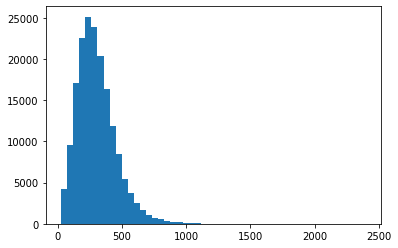

In [38]:
print("Max tokens:", maxlen)
print(idx, "Longest:")
print(longest)
plt.hist(lengths, bins=50)
plt.show()

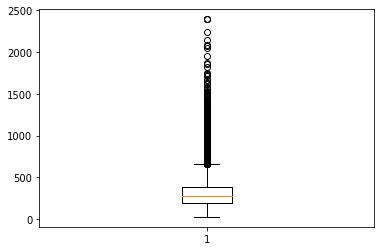

In [39]:
plt.boxplot(lengths)
plt.show()

In [40]:
tokenize(longest)[500:510]

['Act',
 'as',
 'lead',
 'communications',
 'officer',
 'in',
 'times',
 'of',
 'crisis',
 'management']

In [41]:
df.describe(include='object')

Title  \
count                         176359   
unique                        104997   
top     Business Development Manager   
freq                             665   

                                          FullDescription LocationRaw  \
count                                              176359      176359   
unique                                             174954       17355   
top     What is expected of you as a Registered Nurse ...      London   
freq                                                   12       11259   

       LocationNormalized ContractType ContractTime        Company Category  \
count              176359        47227       130262         153003   176359   
unique               2465            2            2          18032       29   
top                    UK    full_time    permanent  UKStaffsearch  IT Jobs   
freq                29613        41507       109141           3648    27664   

                   SalaryRaw     SourceName  \
count                 176359         176358   
unique                 75813            167   
top     50,000-74,999 yearly  totaljobs.com   
freq                    1371          34697   

                                                 FullText  \
count                                              176359   
unique                                             176250   
top     Germanspeaking Customer Service Role for the w...   
freq                                                    3   

                                            FullTextLower  
count                                              176359  
unique                                             176247  
top     germanspeaking customer service role for the w...  
freq                                                    3

# LocationNormalized

In [55]:
print(df.LocationNormalized.describe())

count     176359
unique      2465
top           UK
freq       29613
Name: LocationNormalized, dtype: object


The `LocationNormalized` field doesn't seem too accurate. After all, all the following locations (`LocationRaw` field) are mapped to `UK`:

In [42]:
df[df.LocationNormalized == 'UK']

Id                                              Title  \
6       14131336          Senior Subsea Pipeline Integrity Engineer   
14      24104334    Relief Chef de Partie  Croydon, Surrey  Live in   
26      27739522  Welwyn Chef de Partie does it get any better t...   
27      27739539   Chef de Partie Sauce Award Winning Hertford ****   
28      27740574       Pastry Chef AL**** ****AA Rosette Restaurant   
...          ...                                                ...   
176311  72702933  IT Infrastructure Specialist (Mlnlycke Health ...   
176325  72703348                         C&I Engineering Consultant   
176333  72703374                  Social Worker  Sensory Impairment   
176334  72703379                 Management Accountant ( 6 Months )   
176339  72703432  Salaried GP, Essex, 4 days per week, ****k  NH...   

                                          FullDescription  \
6       A globally renowned engineering and training c...   
14       HOTEL AND CONFERENCE VENUE CHAIN  RELIEF CHEF...   
26      Welwyn Chef de Partie does it get any better t...   
27      Chef de Partie Sauce Award Winning Hertford **...   
28      Pastry Chef De Partie AL**** **** ****AA Roset...   
...                                                   ...   
176311  Molnlycke Health Care is one of the world s le...   
176325  Hays Energy is currently working with a leadin...   
176333  EXPERIENCED QUALIFIED SOCIAL WORKER REQUIRED F...   
176334  Management Accountant ( 6 months ) ****k Our c...   
176339  Salaried GP needed in Essex, 4 days per week. ...   

                                        LocationRaw LocationNormalized  \
6                                 Aberdeen, Borders                 UK   
14                  South Croydon Surrey South East                 UK   
26      Welwyn Garden City Hertfordshire South East                 UK   
27                         Hertfordshire South East                 UK   
28               Stevenage Hertfordshire South East                 UK   
...                                             ...                ...   
176311                            Manchester,Oldham                 UK   
176325                                 Near Bristol                 UK   
176333           Selby but covering Northern Region                 UK   
176334                                 Belfast City                 UK   
176339                            Essex, South East                 UK   

       ContractType ContractTime                     Company  \
6               NaN    permanent               Indigo 21 Ltd   
14              NaN          NaN          Towngate Personnel   
26              NaN          NaN             Clear Selection   
27              NaN          NaN             Clear Selection   
28              NaN          NaN             Clear Selection   
...             ...          ...                         ...   
176311          NaN    permanent                   Molnlycke   
176325          NaN    permanent                         NaN   
176333          NaN    permanent                         NaN   
176334          NaN     contract                         NaN   
176339    full_time    permanent  Global Medics Permanent UK   

                           Category  \
6                  Engineering Jobs   
14      Hospitality & Catering Jobs   
26      Hospitality & Catering Jobs   
27      Hospitality & Catering Jobs   
28      Hospitality & Catering Jobs   
...                             ...   
176311    Healthcare & Nursing Jobs   
176325       Energy, Oil & Gas Jobs   
176333           Other/General Jobs   
176334           Other/General Jobs   
176339    Healthcare & Nursing Jobs   

                                             SalaryRaw  SalaryNormalized  \
6                                 50000 - 100000/annum             75000   
14                                     Upto 9 per hour             17280   
26                                     18000 per annum             18000 

What are the most common locations?

Other than `UK`, the most common seem to be some variation of "London"; e.g. `London`, `South East London`, `Central London`, etc. Also `The City` could refer to London

In [54]:
print(df.LocationNormalized.value_counts()[:50])

UK                     29613
London                 22009
South East London       8383
The City                4751
Manchester              2519
Leeds                   2415
Birmingham              2185
Central London          1881
West Midlands           1807
Surrey                  1703
Reading                 1576
Bristol                 1465
Nottingham              1346
Sheffield               1299
Aberdeen                1148
East Sheen              1129
Hampshire               1109
Belfast                 1108
Milton Keynes           1107
Berkshire               1084
Oxford                  1070
Newcastle Upon Tyne     1032
Liverpool                962
Cambridge                961
Kent                     959
Leicester                877
North West London        828
Guildford                794
Glasgow                  770
Oxfordshire              758
Hertfordshire            756
West Yorkshire           753
Northampton              736
Scotland                 735
Derby         

Closer look at `The City`:

In [53]:
df[df['LocationNormalized'] == 'The City']

Id                                              Title  \
794     46635557                 Occupational Health Advisor London   
812     46635738                             Senior Staff Nurse ITU   
876     46636393    Deputy Manager, Elderly Nursing Home, Chingford   
878     46636397         Lead Nurse, Edmonton, Elderly Nursing Home   
1055    47096034                                         Bookkeeper   
...          ...                                                ...   
176243  72702193  Implant Senior Business Travel consultant  London   
176244  72702194                  SENIOR BUSINESS TRAVEL CONSULTANT   
176245  72702196                         BUSINESS TRAVEL CONSULTANT   
176264  72702352  Financial Crime Officer  UK & EMEA, Investment...   
176265  72702353            UAT  Testing Services  Contracts / perm   

                                          FullDescription  \
794     Job Summary Occupational Health Advisor Qualif...   
812     Private Hospital in Central London is looking ...   
876     Deputy Manager, Elderly Nursing Home, Chingfor...   
878     Lead Nurse, Edmonton, Elderly Nursing Home Whi...   
1055    An exciting media company based in the West en...   
...                                                   ...   
176243  Are you looking for a change and want to work ...   
176244  SENIOR BUSINESS TRAVEL CONSULTANT ****k To ***...   
176245  Business Travel Consultant, London, Salary up ...   
176264  Job Title: Financial Crime Officer  UK EMEA, I...   
176265  Testing Services Testing Services is responsib...   

                   LocationRaw LocationNormalized ContractType ContractTime  \
794     City Of London, London           The City    full_time          NaN   
812     City Of London, London           The City          NaN          NaN   
876     City Of London, London           The City          NaN          NaN   
878     City Of London, London           The City          NaN          NaN   
1055            City of London           The City          NaN    permanent   
...                        ...                ...          ...          ...   
176243                    City           The City          NaN    permanent   
176244                    City           The City          NaN    permanent   
176245                    City           The City          NaN    permanent   
176264          City of London           The City          NaN    permanent   
176265          City of London           The City          NaN    permanent   

       Company                   Category                SalaryRaw  \
794        NaN  Healthcare & Nursing Jobs  36000 to 40000 per year   
812        NaN  Healthcare & Nursing Jobs  29000 to 37000 per year   
876        NaN  Healthcare & Nursing Jobs  34000 to 34000 per year   
878        NaN  Healthcare & Nursing Jobs  27000 to 27000 per year   
1055       NaN         Other/General Jobs            38000 - 45000   
...        ...                        ...                      ...   
176243     NaN                Travel Jobs                25k - 30k   
176244     NaN                Travel Jobs                30k - 40k   
176245     NaN                Travel Jobs                25k - 30k   
176264     NaN  Accounting & Finance Jobs        80,000 - 90,000pa   
176265     NaN  Accounting & Finance Jobs            28000 - 35000   

        SalaryNormalized           SourceName  \
794                38000       careworx.co.uk   
812                33000       careworx.co.uk   
876                34000       careworx.co.uk   
878                27000       careworx.co.uk   
1055               41500           hays.co.uk   
...                  ...                  ...   
176243             27500  traveljobsearch.com   
176244             35000  traveljobsearch.com   
176245             27500  traveljobsearch.com   
176264             85000           hays.co.uk   
176265             31500           hays.co.uk   

                                                 

How well does having 'London' in the job title correspond with `LocationNormalized`?

In [70]:
title_contains_london = df[df.Title.str.contains(r'London\b')]
print(title_contains_london['LocationNormalized'].value_counts()[:20])

London                    3179
South East London         1252
The City                   738
Central London             272
UK                         174
East Sheen                 157
West London                 83
North London                50
East London                 44
South West London           43
Letchworth Garden City      38
North West London           36
North Lambeth               34
Surrey                      27
South East England          22
Boldon Colliery             12
Guildford                    8
Kent                         8
Docklands                    7
Ealing                       5
Name: LocationNormalized, dtype: int64


Mostly OK.. "Letchworth Garden City" is in Hertfordshire, not quite London. See also Surrey, Kent. Londonderry is a false positive. Boldon Colliery is in Sunderland, I think?

In [67]:
title_contains_london[title_contains_london['LocationNormalized'] == 'Letchworth Garden City']

Id                                              Title  \
27272   68293614  iOS Developer (Permanent)  Global eGaming Comp...   
27429   68294546                    IT Security Team Leader  London   
27438   68294590  Senior IT Reseller (Account Manager) London **...   
34315   68575190        Principal Sustainability Consultant  London   
34443   68576284  Senior QA Engineer (Automation and OOP)  Gamin...   
62974   69119732       Sales Executive  Telesales  **** OTE  London   
63456   69128972              C NET DeveloperTravel Industry London   
63509   69129562                   Graphic Designer  Adobe  London    
63576   69130394               Senior Contracts Manager in London (   
75111   69569827                Chartered Building Surveyor  London   
75112   69569842         Senior/Associate Building Surveyor  London   
75233   69572031  Trainee Recruitment Consultant  London (Head o...   
75236   69572043  Trainee Recruitment Consultant  London**** PA ...   
75241   69572065   Graduate Recruitment Consultant **** OTE  London   
75669   69575486      Senior Nodejs / CoffeeScript Developer London   
75673   69575549                    Sustainability Engineer  London   
75930   69577586  Senior Commodities Broker  London  ****K Basic...   
103228  70614272     Trainee Recruitment Consultant  Central London   
103229  70614277     Assistant Construction Manager  Central London   
103232  70614282    Graduate Recruitment Consultant  Central London   
103234  70614313           Senior Product Manager, W London, c****K   
122683  71359274   Senior Urban Designer London  ********  Benefits   
122684  71359276    Senior Urban Designer  ****K****K  Bens  London   
122783  71360677               Substance Misuse Nurse  South London   
122800  71360854  Technical Consultant/Developer c****k Central ...   
122845  71361144   Senior SQL Database Analyst, London, up to ****k   
122847  71361147  Account Director  Buoyant Integrated Agency  L...   
122975  71362245   Mechanical Engineer, Various Locations in London   
123013  71362505                   Senior QA Developer London ****k   
131975  71623399        Sister / Charge Nurse (Oncology)  UK London   
132030  71623924   Mathematics Teacher  London  Mathematics Teacher   
132033  71623927     Senior Staff Nurse (Oncology)  UK London Based   
132042  71623964       Clinical Nurse Manager (Oncology)  UK London   
132228  71625808  PreConstruction Manager  Corporate Office FitO...   
151970  72198514  MS Dynamics CRM Developer, London, ****k  Bene...   
151978  72198584  HVAC Maintenance Engineer Central London ****K...   
152055  72199694   Sales Ledger Manager  Legal Sector  London ****k   
159703  72384818  Web Analyst fashion London ****K  google analy...   

                                          FullDescription  \
27272   iOS Developer (Permanent)  Global eGaming Comp...   
27429   Certes Computing has been instructed to recrui...   
27438   Senior IT Reseller (Account Manager) London **...   
34315   Principal Sustainability Consultant  London HA...   
34443   QA Engineer (Automation, Java and OOP)  Major ...   
62974   An opening for 2 Sales Executives has become a...   
63456   My a client, a very well established name in t...   
63509   Greywood Associates are proudly representing o...   
63576   Senior Contracts Manager Job In London: Senior...   
75111   Chartered Building Surveyor  London A multi di...   
75112   Senior/Associate Building Surveyor  Londonref:...   
75233   Are you looking for a lucrative career in sale...   
75236   Are you looking for a lucrative career in sale...   
75241   Graduate Recruitment Consultant **** OTE  Lond...   
75669   Senior Node.js / CoffeeScript Developer  Londo...   
75673   Sustainability Engineer  London HA **** Our cl...   
75930   Our client is a leading Alternative Investment...   
103228  Project Resource, a privatelyowned specialist ...   
103229  Assistant Construction Manager required for la...   
103232  Project Resource

In [71]:
title_contains_london[title_contains_london['LocationNormalized'] == 'Boldon Colliery']

Id                                              Title  \
63534   69129885             Calling all local East London Teachers   
63571   69130326  PPA Teacher required for East London  January ...   
75841   69576935                            KS1 Teacher East London   
76008   69578021  Senior Quantity Surveyor  Mixed Use Scheme  Ea...   
123006  71362464         Social Worker, Hospital Team, South London   
132093  71624403            Qualified Audiologist/HAD  N & E London   
132227  71625806  Senior Sales & Business Dev Manager  ****K  **...   
152028  72199204     Creative Drama Teacher Required In East London   
152031  72199236  Female PE Teacher Needed In Outstanding East L...   
160551  72397232           KS2 Teachers Wanted in South East London   
160692  72398073      Maths Teacher  Great School South East London   
160734  72398357     Primary Trained EBD Teacher  South East London   

                                          FullDescription  \
63534   KS2 Teacher  wanted now for a Multicultural sc...   
63571   A large Primary school in Newham, London is lo...   
75841   KS1 Teacher  East LondonYear ****TeacherGood O...   
76008   We have an immediate requirement for a Senior ...   
123006  HCL Social Care is looking to recruit a number...   
132093  Qualified Audiologist/Hearing Aid Dispenser  N...   
132227  Our client specialise in developing bespoke pi...   
152028  Fantastic Mixed Comprehensive School in East L...   
152031  Female PE Teacher required for an exceptional ...   
160551  KS2 Teachers Wanted in South East London Long ...   
160692  Reeson Education is looking for a Maths teache...   
160734  Primary Trained EBD Teacher  South East London...   

                        LocationRaw LocationNormalized ContractType  \
63534   Tyne and Wear - East Boldon    Boldon Colliery    full_time   
63571   Tyne and Wear - East Boldon    Boldon Colliery    full_time   
75841   Tyne and Wear - East Boldon    Boldon Colliery    full_time   
76008   Tyne and Wear - East Boldon    Boldon Colliery    full_time   
123006  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
132093  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
132227  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
152028  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
152031  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
160551  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
160692  Tyne and Wear - East Boldon    Boldon Colliery    full_time   
160734  Tyne and Wear - East Boldon    Boldon Colliery    full_time   

       ContractTime        Company                   Category      SalaryRaw  \
63534     permanent  UKStaffsearch      HR & Recruitment Jobs  31680 - 42240   
63571     permanent  UKStaffsearch                 Admin Jobs  33000 - 43560   
75841     permanent  UKStaffsearch      HR & Recruitment Jobs  25000 - 45000   
76008     permanent  UKStaffsearch  Trade & Construction Jobs  55000 - 65000   
123006    permanent  UKStaffsearch         Other/General Jobs  52800 - 63360   
132093    permanent  UKStaffsearch  Healthcare & Nursing Jobs  25000 - 30000   
132227    permanent  UKStaffsearch                 Sales Jobs  45000 - 55000   
152028    permanent  UKStaffsearch      HR & Recruitment Jobs  33000 - 46200   
152031    permanent  UKStaffsearch      HR & Recruitment Jobs  33000 - 46200   
160551    permanent  UKStaffsearch      HR & Recruitment Jobs  31680 - 39600   
160692    permanent  UKStaffsearch      HR & Recruitment Jobs  20000 - 47000   
160734    permanent  UKStaffsearch      HR & Recruitment Jobs  39600 - 52800   

        SalaryNormalized         SourceName  \
63534              36960  ukstaffsearch.com   
63571              38280  ukstaffsearch.com   
75841              35000  ukstaffsearch.com   
76008              60000  ukstaffsearch.com   
123006             58080  ukstaffsearch.com   
132093             27500  ukstaffsearch.com   
13

In [65]:
title_contains_london[title_contains_london['LocationNormalized'] == 'Romford']

Id                                            Title  \
57819  69020406  Senior Estimator (Construction)  London / Essex   

                                         FullDescription     LocationRaw  \
57819  Our client is a construction main contractor w...  Romford, Essex   

      LocationNormalized ContractType ContractTime            Company  \
57819            Romford          NaN    permanent  UK Labour Limited   

                        Category                               SalaryRaw  \
57819  Trade & Construction Jobs  55000 - 65000/annum plus car + package   

       SalaryNormalized        SourceName  \
57819             60000  cv-library.co.uk   

                                                FullText  \
57819  Senior Estimator (Construction)  London / Esse...   

                                           FullTextLower  
57819  senior estimator (construction)  london / esse...

It looks like the location is often wrong; e.g "Letchworth Garden City" and "Boldon Colliery" are incorrectly specified as the location for some London job vacancies.

These are both with Company "UKStaffsearch" who also seem to have the wrong Category... e.g. teaching jobs are categorised as "HR & Recruitment Jobs", IT Security Team Leader is categorised under "Sales Jobs", "iOS Developer" is under "Admin Jobs", etc.

Might be worth checking if these problems are restricted to UKStaffsearch only (edit: also London4Jobs)

In [73]:
title_contains_london[title_contains_london['LocationNormalized'] == 'UK']

Id                                              Title  \
2128    56293373                          Bus Mechanic  West London   
2773    59909287  Alternative Investment Specialist – London  **...   
4374    62117464                             Coach Mechanic  London   
4379    62117536                  PCV Technician  south east London   
4387    62118548                       Primary Supply  North London   
...          ...                                                ...   
169666  72546301  Senior Hosting Server Engineer  Windows/Vmware...   
169879  72547124  Systems Administrator  Networking Cloud  Berli...   
171891  72625399  Deputy Managers Required Across London and Bri...   
171931  72625862             Clinical Project Manager (CPM)  London   
173760  72674637  Network Administrator  Cisco & Checkpoint  Twi...   

                                          FullDescription  \
2128    Job Title: HGV/Bus Mechanic/PCV Technician/Die...   
2773    Are you interested in joining a prestigious in...   
4374    Job Title: Bus/Coach Mechanic/PCV Mechanic (PS...   
4379    Job Title: HGV/PCV Technician/Diesel Fitter/PS...   
4387    As always at this time of year, we are experie...   
...                                                   ...   
169666  Based in Wembley, Middlesex our client is look...   
169879  Systems Administrator  Networking & Cloud  Lon...   
171891  Magic Roundabout Nurseries Ltd are seeking exp...   
171931  Calling all Clinical Project Managers. Non Sto...   
173760  Network Administrator  Cisco Checkpoint  Twick...   

                                              LocationRaw LocationNormalized  \
2128                                            Middlesex                 UK   
2773                                                   UK                 UK   
4374                                                   UK                 UK   
4379                                                   UK                 UK   
4387                                                   UK                 UK   
...                                                   ...                ...   
169666                                          Middlesex                 UK   
169879                                     Berlin, Non UK                 UK   
171891  Bristol, Docklands, Kennington, Stockwell and ...                 UK   
171931                                         UK England                 UK   
173760                    Twickenham Middlesex South East                 UK   

       ContractType ContractTime                         Company  \
2128      full_time    permanent                       DrivingGB   
2773            NaN          NaN              Zest 2 Recruitment   
4374      full_time    permanent                       DrivingGB   
4379      full_time    permanent                       DrivingGB   
4387      full_time    permanent                 Vision Teaching   
...             ...          ...                             ...   
169666          NaN    permanent         Greywood Associates Ltd   
169879          NaN    permanent                    Bridge Noble   
171891    full_time    permanent  Magic Roundabout Nurseries Ltd   
171931          NaN    permanent             NonStop Recruitment   
173760          NaN    permanent                   Prism Digital   

                         Category  \
2128           Other/General Jobs   
2773    Accounting & Finance Jobs   
4374             Engineering Jobs   
4379             Engineering Jobs   
4387                Teaching Jobs   
...                           ...   
169666                    IT Jobs   
169879                    IT Jobs   
171891              Teaching Jobs   
171931  Healthcare & Nursing Jobs   
173760                    IT Jobs   

                                           SalaryRaw  SalaryNormalized  \
2128                  From 29,000 to 35,000 per year             32000   
2773                            18K Basic, plus comm     

A closer look at `LocationNormalized == UK`.

72547124 "Systems Administrator  Networking Cloud  Berlin / London". Looks like they're hiring in either London _or_ Berlin. `LocationRaw == "Berlin, Non UK"` which isn't quite accurate either.

72625399 "Deputy Managers Required Across London and Bristol". `LocationRaw == "Bristol, Docklands, Kennington, Stockwell and Walthamstow"`

72625862 "Clinical Project Manager (CPM)  London" The description is looking for staff across the UK; it's not clear whether the actual job is in London or there are vacancies across the UK.

72674637 "Network Administrator  Cisco & Checkpoint  Twickenham, West London". The job is in Twickenham, W. London but that's normalised to `UK`

In [75]:
description_contains_london = df[df.FullDescription.str.contains(r'London\b')]
description_contains_london['LocationNormalized'].value_counts()[:20]

London                    12247
South East London          4802
The City                   2792
UK                         1664
Central London             1032
East Sheen                  705
West London                 309
Surrey                      237
North London                233
North Lambeth               200
East London                 200
Letchworth Garden City      191
South West London           187
Kent                        137
North West London           123
Berkshire                   117
Reading                     115
South East England          105
Essex                        93
Hertfordshire                71
Name: LocationNormalized, dtype: int64

This seems slightly better (no "Boldon Colliery" but still "Letchworth Garden City").

In [76]:
description_contains_london[description_contains_london['LocationNormalized'] == 'UK']

Id                                              Title  \
828     46635911         RGN Staff Nurses for Nursing Home Southall   
1056    47122145  ORACLE FINANCIAL SUPPORT CONSULTANT / ORACLE F...   
1841    55409161                 Messaging and Technical Specialist   
2128    56293373                          Bus Mechanic  West London   
2354    57513948                    Male LD Support Worker required   
...          ...                                                ...   
175774  72692182        Charity Fundraisers  GET PAID TO SAVE LIVES   
175792  72692728                                  Geography Teacher   
175806  72693440                                 Business Architect   
175962  72695033                    P**** Planner  Civils  Heathrow   
176339  72703432  Salaried GP, Essex, 4 days per week, ****k  NH...   

                                          FullDescription  \
828     RGN Staff Nurses Required for Nursing Home in ...   
1056    ORACLE FINANCIAL SUPPORT CONSULTANT / ORACLE F...   
1841    Messaging and Technical Specialist An outstand...   
2128    Job Title: HGV/Bus Mechanic/PCV Technician/Die...   
2354    Eden Brown Recruitment are looking for a very ...   
...                                                   ...   
175774  CHARITY FUNDRAISING REPRESENTATIVES  GET PAID ...   
175792  Are you a creative and enthusiastic Geography ...   
175806  The Guinness Partnership has an exciting oppor...   
175962  Our client is a marketleading consultancy with...   
176339  Salaried GP needed in Essex, 4 days per week. ...   

                                              LocationRaw LocationNormalized  \
828                                   Southall, Middlesex                 UK   
1056                                      Croydon, Surrey                 UK   
1841                                            Middlesex                 UK   
2128                                            Middlesex                 UK   
2354                                   Enfield, Middlesex                 UK   
...                                                   ...                ...   
175774  Sheffield,South Yorkshire,DRONFIELD,HILLSBOROU...                 UK   
175792                        West Midlands,Not Specified                 UK   
175806                                  Lancashire,Oldham                 UK   
175962                        Middlesex Middlesex England                 UK   
176339                                  Essex, South East                 UK   

       ContractType ContractTime                     Company  \
828             NaN          NaN                         NaN   
1056            NaN    permanent              XL Recruitment   
1841      full_time    permanent                       JOBG8   
2128      full_time    permanent                   DrivingGB   
2354            NaN          NaN                         NaN   
...             ...          ...                         ...   
175774          NaN    permanent              Recruit4Talent   
175792          NaN    permanent                Jobsite Jobs   
175806          NaN    permanent                Jobsite Jobs   
175962          NaN          NaN            Project Resource   
176339    full_time    permanent  Global Medics Permanent UK   

                         Category  \
828     Healthcare & Nursing Jobs   
1056                      IT Jobs   
1841                      IT Jobs   
2128           Other/General Jobs   
2354    Healthcare & Nursing Jobs   
...                           ...   
175774                 Sales Jobs   
175792              Teaching Jobs   
175806                    IT Jobs   
175962         Other/General Jobs   
176339  Healthcare & Nursing Jobs   

                                               SalaryRaw  SalaryNormalized  \
828                              22108 to 25796 per year             23952   
1056      55000 - 60000/annum 55-60,000 Basic + Benefits             57500   
1841           Up t

72693440: "...with distinct regional presences in the North, South West, South East, **London** and the East" But "This role can be based in either Oldham or High Wycombe"

72692728: LocationRaw = "West Midlands, Not Specified". The job is in Dudley. The description mentions the school "has received some of the best results in **London** and nationwide over the last 2 years."

72692182: seems to be looking for recruits in many different parts of the country.

**Note:** Could the argument be made that having a single "Location" is flawed because some ads are recruiting for jobs in multiple locations?

Looking at jobs where specified location is London, but the title doesn't mention London. I want to see if Title is a good way to determine if a job is in London or not

In [82]:
location_is_london = df[df.LocationNormalized.str.contains(r'London\b')]
location_is_london[~location_is_london.Title.str.contains(r'London\b')]

Id                                              Title  \
22      27527047                                    C/C++ Developer   
23      27527050                               Senior PHP Developer   
51      32423204                                Key Account Manager   
71      34858822  Chef De Parties Required Nationwide many with ...   
103     42128300                            Cluster Revenue Manager   
...          ...                                                ...   
176324  72703235                                     Events Officer   
176330  72703369            Senior Practitioner Children's Services   
176336  72703385                                          Payroller   
176337  72703387                         Commercial Account Manager   
176343  72703748                                     Data Architect   

                                          FullDescription  \
22      A leading company that provides stock market a...   
23      A skilled Senior PHP Developer is required by ...   
51      Our client, a fantastic venue in London is see...   
71      Chef De Parties Required Nationwide many with ...   
103     Our client is part of a national hotel chain t...   
...                                                   ...   
176324  A well respected notforprofit membership organ...   
176330  Senior Practitioner Children s Social Care An ...   
176336  NEED PAYROLLERS WITH ESR WHO HAVE WORKED AT PR...   
176337  Commercial Account Manager Role An opportunity...   
176343  A vibrant charitable institute based in Kensin...   

                   LocationRaw LocationNormalized ContractType ContractTime  \
22                      London             London          NaN    permanent   
23      Central London, London     Central London          NaN    permanent   
51           London South East  South East London          NaN          NaN   
71          UK, Greater London             London          NaN          NaN   
103          London South East  South East London          NaN          NaN   
...                        ...                ...          ...          ...   
176324                  London             London    full_time    permanent   
176330                  London             London          NaN    permanent   
176336                  London             London          NaN     contract   
176337                  London             London          NaN    permanent   
176343                  London             London          NaN    permanent   

                  Company                          Category  \
22          Indigo 21 Ltd                           IT Jobs   
23          Indigo 21 Ltd                           IT Jobs   
51      Chess Partnership       Hospitality & Catering Jobs   
71        Clear Selection       Hospitality & Catering Jobs   
103     Chess Partnership       Hospitality & Catering Jobs   
...                   ...                               ...   
176324    ESP Recruitment  PR, Advertising & Marketing Jobs   
176330                NaN                Other/General Jobs   
176336                NaN                Other/General Jobs   
176337                NaN                Other/General Jobs   
176343                NaN          Charity & Voluntary Jobs   

                                                SalaryRaw  SalaryNormalized  \
22                                    25000 - 40000/annum             32500   
23                                    40000 - 50000/annum             45000   
51           From 40,000 to 45,000 per annum plus package             42500   
71                                        19000 per annum             19000   
103     From 35,000 to 42,000 per annum plus bonus, pe...             38500   
...                                                   ...               ...   
176324                                            18k-23k             20500   
176330                                    33,510 - 39,789             36649   
176336     

27527047: Doesn't mention location

27527050: Description mentions job is in Central London

34858822: is Nationwide, but `LocationRaw` is London


Looks like FullDescription might be better for determining if a job is in London:

In [85]:
location_is_london[~location_is_london.FullDescription.str.contains(r'London\b') & ~location_is_london.Title.str.contains(r'London\b')]

Id                                              Title  \
22      27527047                                    C/C++ Developer   
71      34858822  Chef De Parties Required Nationwide many with ...   
105     42757111                         Exhibition Project Manager   
108     43611713                         SALES ENGINEER  NORTH WEST   
111     43713923                            Maintenance Electrician   
...          ...                                                ...   
176288  72702599                   Scientific Editorial Team Leader   
176313  72702947                                 Deputy Lab Manager   
176320  72703191  Portfolio Manager/Head of Production  B2B Conf...   
176336  72703385                                          Payroller   
176343  72703748                                     Data Architect   

                                          FullDescription         LocationRaw  \
22      A leading company that provides stock market a...              London   
71      Chef De Parties Required Nationwide many with ...  UK, Greater London   
105     Andy File Associates Limited are working on be...          South East   
108     Europe s leading manufacturer of electrical/el...          NORTH WEST   
111     Our client, a global service provider, require...              London   
...                                                   ...                 ...   
176288  Company This Global Medical Education Agency’s...              London   
176313  My client has a vacancy for a Deputy Lab Manag...              London   
176320  Our client is a market leader in producing lar...              London   
176336  NEED PAYROLLERS WITH ESR WHO HAVE WORKED AT PR...              London   
176343  A vibrant charitable institute based in Kensin...              London   

       LocationNormalized ContractType ContractTime                   Company  \
22                 London          NaN    permanent             Indigo 21 Ltd   
71                 London          NaN          NaN           Clear Selection   
105     South East London          NaN    permanent  Andy File Associates Ltd   
108     North West London          NaN    permanent                        OP   
111                London          NaN     contract                       NaN   
...                   ...          ...          ...                       ...   
176288             London    full_time    permanent      Executive Facilities   
176313             London          NaN    permanent                 Matchtech   
176320             London    full_time    permanent      Real Recruitment Ltd   
176336             London          NaN     contract                       NaN   
176343             London          NaN    permanent                       NaN   

                                Category  \
22                               IT Jobs   
71           Hospitality & Catering Jobs   
105                   Other/General Jobs   
108                           Sales Jobs   
111               Creative & Design Jobs   
...                                  ...   
176288         Healthcare & Nursing Jobs   
176313         Healthcare & Nursing Jobs   
176320  PR, Advertising & Marketing Jobs   
176336                Other/General Jobs   
176343          Charity & Voluntary Jobs   

                                                SalaryRaw  SalaryNormalized  \
22                                    25000 - 40000/annum             32500   
71                                        19000 per annum             19000   
105                                   35000 - 45000/annum             40000   
108                                   27000 - 35000/annum             31000   
111                                   12.50 - 13 per hour             24480   
...                                                   ...               ...   
176288  From 45,000 to 55,000 per year + Pension, Heal...             50000   
176313                                       24k - 30k

72703748: Mentions Kensington (which is in London)

72703385: Doesn't mention location

72703191: Doesn't mention location

72702947: Doesn't mention location

72702599: Doesn't mention location

43713923: Mentions Middlesex, which is basically in London

43611713: Mentions North West: LocationNormalized = "North West London" but I think the job is NW England.

42757111: No mention of location, but lots of travel involved. LocationNormalized = "South East London" but could be SE England?

34858822: Job is nationwide, but LocationRaw specified as Greater London. Not sure if that's correct.

In [89]:
print(len(title_contains_london[~title_contains_london.FullDescription.str.contains(r'London\b')]))
print(len(description_contains_london[~description_contains_london.Title.str.contains(r'London\b')]))

1091
23596


**Note:** Hard to see what to do here. Sometimes the location fields are wrong or not quite accurate (e.g. UK). Sometimes the job description and/or title contain "London" but the location fields specify somewhere else; sometimes the job description and title don't mention "London" but the location fields do.

All-in-all it looks like the location fields aren't super-dependable. I might be as well-off ignoring them.

(1,091 jobs with "London" in their title don't have "London" in their description; 23,596 jobs with "London" in their description don't have "London" in their title)

One thing I could do is create a boolean "IsLondon" field: a job is in London if the location fields contain "London" or "The City", or if the description contains "London"

In [109]:
london = r'London\b'

def is_london(row):
    alltext = ' '.join([row.LocationRaw, row.LocationNormalized, row.Title, row.FullDescription])
    return bool(re.match(london, alltext))

# print(df.head(100).apply(is_london, axis=1))

if 'IsLondon' in df.columns:
    df = df.drop('IsLondon', 1)

df['IsLondon'] = df.apply(is_london, axis=1)

In [110]:
df[df.IsLondon == True]

Id                                              Title  \
22      27527047                                    C/C++ Developer   
51      32423204                                Key Account Manager   
95      40379849  Butler/Room Service Manager  **** Star Deluxe ...   
103     42128300                            Cluster Revenue Manager   
111     43713923                            Maintenance Electrician   
...          ...                                                ...   
176328  72703357                         Reservoir Engineer  London   
176330  72703369            Senior Practitioner Children's Services   
176336  72703385                                          Payroller   
176337  72703387                         Commercial Account Manager   
176343  72703748                                     Data Architect   

                                          FullDescription        LocationRaw  \
22      A leading company that provides stock market a...             London   
51      Our client, a fantastic venue in London is see...  London South East   
95      Butler/In Room Dining Manager  5 Star Deluxe H...  London South East   
103     Our client is part of a national hotel chain t...  London South East   
111     Our client, a global service provider, require...             London   
...                                                   ...                ...   
176328  Senior Reservoir Engineer London Hays Oil and ...             London   
176330  Senior Practitioner Children s Social Care An ...             London   
176336  NEED PAYROLLERS WITH ESR WHO HAVE WORKED AT PR...             London   
176337  Commercial Account Manager Role An opportunity...             London   
176343  A vibrant charitable institute based in Kensin...             London   

       LocationNormalized ContractType ContractTime             Company  \
22                 London          NaN    permanent       Indigo 21 Ltd   
51      South East London          NaN          NaN   Chess Partnership   
95      South East London          NaN          NaN  Regent Recruitment   
103     South East London          NaN          NaN   Chess Partnership   
111                London          NaN     contract                 NaN   
...                   ...          ...          ...                 ...   
176328             London          NaN    permanent                 NaN   
176330             London          NaN    permanent                 NaN   
176336             London          NaN     contract                 NaN   
176337             London          NaN    permanent                 NaN   
176343             London          NaN    permanent                 NaN   

                           Category  \
22                          IT Jobs   
51      Hospitality & Catering Jobs   
95      Hospitality & Catering Jobs   
103     Hospitality & Catering Jobs   
111          Creative & Design Jobs   
...                             ...   
176328       Energy, Oil & Gas Jobs   
176330           Other/General Jobs   
176336           Other/General Jobs   
176337           Other/General Jobs   
176343     Charity & Voluntary Jobs   

                                                SalaryRaw  SalaryNormalized  \
22                                    25000 - 40000/annum             32500   
51           From 40,000 to 45,000 per annum plus package             42500   
95      From 35,000 to 45,000 per annum Plus pension a...             40000   
103     From 35,000 to 42,000 per annum plus bonus, pe...             38500   
111                                   12.50 - 13 per hour             24480   
...                                                   ...               ...   
176328                         80,000 - 100,000 + Package             90000   
176330                                    33,510 - 39,789             36649   
176336                                             28,000             28000   
176337                                  

In [111]:
df[df.IsLondon == False]

Id                                              Title  \
0       12612628                        Engineering Systems Analyst   
1       12612830                            Stress Engineer Glasgow   
2       12612844                   Modelling and simulation analyst   
3       12613049  Engineering Systems Analyst / Mathematical Mod...   
4       12613647         Pioneer, Miser Engineering Systems Analyst   
...          ...                                                ...   
176354  72705211                                 TEACHER OF SCIENCE   
176355  72705212                TEACHER OF BUSINESS STUDIES AND ICT   
176356  72705213                                    ENGLISH TEACHER   
176357  72705216                                    SUPPLY TEACHERS   
176358  72705235                                         Accountant   

                                          FullDescription  \
0       Engineering Systems Analyst Dorking Surrey Sal...   
1       Stress Engineer Glasgow Salary **** to **** We...   
2       Mathematical Modeller / Simulation Analyst / O...   
3       Engineering Systems Analyst / Mathematical Mod...   
4       Pioneer, Miser  Engineering Systems Analyst Do...   
...                                                   ...   
176354  Position: Qualified Teacher Subject/Specialism...   
176355  Position: Qualified Teacher or NQT Subject/Spe...   
176356  Position: Qualified Teacher Subject/Specialism...   
176357  Position: Qualified Teacher Subject/Specialism...   
176358  This entrepreneurial and growing private equit...   

                              LocationRaw LocationNormalized ContractType  \
0                 Dorking, Surrey, Surrey            Dorking          NaN   
1             Glasgow, Scotland, Scotland            Glasgow          NaN   
2       Hampshire, South East, South East          Hampshire          NaN   
3          Surrey, South East, South East             Surrey          NaN   
4          Surrey, South East, South East             Surrey          NaN   
...                                   ...                ...          ...   
176354                            Swindon            Swindon          NaN   
176355                            Swindon            Swindon          NaN   
176356                            Swindon            Swindon          NaN   
176357                          Wiltshire          Wiltshire          NaN   
176358                            Hitchin            Hitchin          NaN   

       ContractTime                       Company          Category  \
0         permanent  Gregory Martin International  Engineering Jobs   
1         permanent  Gregory Martin International  Engineering Jobs   
2         permanent  Gregory Martin International  Engineering Jobs   
3         permanent  Gregory Martin International  Engineering Jobs   
4         permanent  Gregory Martin International  Engineering Jobs   
...             ...                           ...               ...   
176354     contract                           NaN     Teaching Jobs   
176355     contract                           NaN     Teaching Jobs   
176356     contract                           NaN     Teaching Jobs   
176357     contract                           NaN     Teaching Jobs   
176358    permanent                           NaN     Teaching Jobs   

                                     SalaryRaw  SalaryNormalized  \
0                   20000 - 30000/annum 20-30K             25000   
1                   25000 - 35000/annum 25-35K             30000   
2                   20000 - 40000/annum 20-40K             30000   
3       25000 - 30000/annum 25K-30K negotiable             27500   
4                   20000 - 30000/annum 20-30K             25000   
...                                        ...               ...   
176354                      450 - 500 per week             22800   
176355                      450 - 500 per week             22800   
176356                      450 - 500 

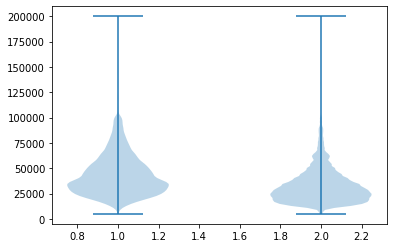

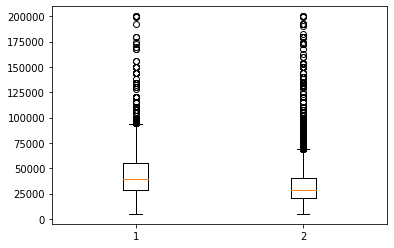

In [115]:
london_salaries = df[df.IsLondon == True].SalaryNormalized.values
other_salaries = df[df.IsLondon == False].SalaryNormalized.values

plt.violinplot([london_salaries, other_salaries])
plt.show()
plt.boxplot([london_salaries, other_salaries])
plt.show()

# Misc

In [43]:
df[df['FullDescription'].str.startswith("What is expected of you as a Registered Nurse")]

Id                                              Title  \
9996    66626409  Registered Nurse (RMN)  Barchester Healthcare ...   
10002   66626508  Registered Nurse (RGN)  Barchester Healthcare ...   
17971   67748454  Registered Nurse (RGN)  Barchester Healthcare ...   
21933   68062366      Registered Nurse (RGN)  Barchester Healthcare   
22040   68062828      Registered Nurse (RGN)  Barchester Healthcare   
...          ...                                                ...   
163055  72441675            Registered Nurse (RGN)(N) Barchester HC   
164088  72445296      Registered Nurse (RGN)  Barchester Healthcare   
171117  72600834                  Registered Nurse (RGN)  Edgbaston   
171123  72600942              Registered Nurse (RGN)  Gorseway Care   
171131  72601015                     Registered Nurse (RGN)  Kenwyn   

                                          FullDescription  \
9996    What is expected of you as a Registered Nurse ...   
10002   What is expected of you as a Registered Nurse ...   
17971   What is expected of you as a Registered Nurse ...   
21933   What is expected of you as a Registered Nurse ...   
22040   What is expected of you as a Registered Nurse ...   
...                                                   ...   
163055  What is expected of you as a Registered Nurse ...   
164088  What is expected of you as a Registered Nurse ...   
171117  What is expected of you as a Registered Nurse ...   
171123  What is expected of you as a Registered Nurse ...   
171131  What is expected of you as a Registered Nurse ...   

                              LocationRaw LocationNormalized ContractType  \
9996                          Basingstoke        Basingstoke    full_time   
10002                             Ashford            Ashford    full_time   
17971                              Stroud             Stroud    part_time   
21933        Dalkeith Midlothian Scotland           Dalkeith          NaN   
22040      North London London South East      North Lambeth          NaN   
...                                   ...                ...          ...   
163055      Oxford Oxfordshire South East             Oxford          NaN   
164088  Skipton North Yorkshire Yorkshire            Skipton          NaN   
171117                           Dalkeith           Dalkeith    full_time   
171123                     Hayling Island     Hayling Island    full_time   
171131                              Truro              Truro    full_time   

       ContractTime                    Company                   Category  \
9996            NaN      Barchester Healthcare  Healthcare & Nursing Jobs   
10002           NaN      Barchester Healthcare  Healthcare & Nursing Jobs   
17971           NaN      Barchester Healthcare  Healthcare & Nursing Jobs   
21933     permanent      Barchester Healthcare  Healthcare & Nursing Jobs   
22040     permanent      Barchester Healthcare  Healthcare & Nursing Jobs   
...             ...                        ...                        ...   
163055    permanent      Barchester Healthcare  Healthcare & Nursing Jobs   
164088    permanent      Barchester Healthcare  Healthcare & Nursing Jobs   
171117          NaN  Barchester Healthcare Plc  Healthcare & Nursing Jobs   
171123          NaN                        NaN  Healthcare & Nursing Jobs   
171131          NaN  Barchester Healthcare Plc  Healthcare & Nursing Jobs   

                                   SalaryRaw  SalaryNormalized  \
9996                              13.50/Hour             25920   
10002                             11.18/Hour             21465   
17971                             12.50/Hour             24000   
21933   11.53 per hour + See Job Description             22137   
22040   12.00 per hour + See Job Description             23040   
...                                      ...               ...   
163055  12.81 per hour + See Job Description             24595   
164088  12.22 per hour + See Job Description      

In [161]:
locations = np.array(df.LocationRaw.values)

def top_n(input, n=50):
    return Counter(input).most_common(n)

def print_top_n(input, n=50):
    for value, count in Counter(input).most_common(n):
        print("- {:6d} : {}".format(count, value))

print_top_n(df.LocationRaw.values)

-  11259 : London
-   6186 : London South East
-   3980 : UK
-   2063 : City London South East
-   1651 : City of London - London
-   1601 : West Midlands
-   1566 : City of London
-   1345 : Birmingham
-   1342 : Manchester Lancashire North West
-   1242 : Central London
-   1139 : Manchester
-   1093 : Belfast
-   1022 : Birmingham West Midlands (County) West Midlands
-    985 : South East
-    982 : Greater London
-    949 : Leeds West Yorkshire Yorkshire
-    926 : Surrey
-    865 : Bristol
-    796 : Bristol Avon South West
-    787 : Leeds
-    702 : Scotland
-    673 : Reading Berkshire South East
-    658 : City of London, London
-    656 : Central London / West End London South East
-    648 : North West
-    586 : Hertfordshire
-    583 : Hampshire
-    574 : West London London South East
-    564 : Berkshire
-    562 : Essex
-    544 : South West London London South East
-    541 : Glasgow
-    528 : Kent
-    510 : Sheffield
-    495 : City of london London Greater London
-

In [163]:
print(df.Company.describe())

count            153003
unique            18032
top       UKStaffsearch
freq               3648
Name: Company, dtype: object


In [184]:
fmt = "{:10} {:14.6f}"
salaries = np.array(df.SalaryNormalized.values)
print(fmt.format('Count', len(salaries)))
print(fmt.format('Mean', np.mean(salaries)))
print(fmt.format('Std', np.std(salaries)))
print(fmt.format('Min', np.min(salaries)))
percentiles = [25, 50, 75, 90, 95, 99]
for i, p in enumerate(np.percentile(salaries, percentiles)):
    print('{:2}% {:21.6f}'.format(percentiles[i], p))
print(fmt.format('Max', np.max(salaries)))

Count       176359.000000
Mean         34109.853764
Std          17640.893775
Min           5000.000000
25%          21500.000000
50%          30000.000000
75%          42500.000000
90%          58578.000000
95%          70000.000000
99%          90000.000000
Max         200000.000000
